# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaning the data
    - Tidy up the column names, make sure there is no spaces
    - Observe,comment on and handle inconsistent data.(i.e duplicates, irrelevant data,incorrect data,etc)
    - Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR).
    - Handle missing data
    - Observe and comment on outliers
    - Handle outliers
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
    - Add 2 new columns named 'Week number' and 'Date range' and discretize the data into weeks according to the dates. 
        - Tip: Change the datatype of the date feature to datetime type instead of object.
    - Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
    - If exists , Identify feature(s) which need normalization and show your reasoning. Then choose a technique to normalize the feature(s) and comment on why you chose this technique.
- Additional data extraction
    - Add GPS coordinates for the cities/locations.
    - For this task you can extract the GPS coordinates from an API or web scraping and integrate into your csv file as new features. 
    - Tip 1 - you can find the web scraping and data integration notebooks under 'additional resources'  on the CMS useful.
    - Tip 2 - If you are going to use an API make sure you do not make request for each existing row but rather group by the cities and get their respective coordinates. Making a request for each row is too inefficient and expensive.
    - Tip 3 - Rather than running the code for calling the API each time you load the notebook, the first time you call the API save the results in a csv file and then you could you check if a csv file exists for the GPS coordinates, if so, load directly and don't call APi. Same applies for web scraping.

- Lookup table and load back into new csv file
    - Create a lookup table
    - Load the new dataset into a new csv file named `green_trip_data_{year}-{month}clean.csv`. replace year and month with the appropriate values.
    - Load the lookup table to a csv file called `lookup_table_green_taxis.csv` 
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

***Important note*** - This is merely a template. you are more than free to change how it looks or create one from scratch.

# 1 - Extraction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from opencage.geocoder import OpenCageGeocode
from IPython.display import FileLink

In [2]:
data_dir = 'M:/Education/9th Semester/Data Engineering/Tutorials/Datasets/'

the csv of the Look up table is in the bottom

In [ ]:
Lookup_df = pd.read_csv(data_dir + 'Lookup_Table.csv')
Lookup_df

In [3]:
Green_Taxi_df = pd.read_csv(data_dir + 'green_tripdata_2017-08.csv')
df = Green_Taxi_df

In [4]:
Green_Taxi_df.head(10)

,Vendor,lpep pickup datetime,lpep dropoff datetime,store and fwd flag,Rate type,PU Location,DO Location,passenger count,trip distance,fare amount,extra,mta tax,tip amount,tolls amount,ehail fee,improvement surcharge,total amount,payment type,trip type,congestion surcharge
0,VeriFone Inc.,2017-08-01 00:21:35,2017-08-01 00:27:59,N,Standard rate,"Manhattan,Central Park","Manhattan,Upper West Side North",1.0,1.43,7.0,0.5,0.5,1.66,0.0,NaN,0.3,9.96,Credit card,Street-hail,NaN
1,VeriFone Inc.,2017-08-01 00:37:27,2017-08-01 00:39:02,N,Standard rate,"Manhattan,Morningside Heights","Manhattan,Morningside Heights",1.0,0.44,3.5,0.5,0.5,0.00,0.0,NaN,0.3,4.80,Cash,Street-hail,NaN
2,VeriFone Inc.,2017-08-01 00:04:03,2017-08-01 00:05:45,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",1.0,0.32,3.5,0.5,0.5,0.00,0.0,NaN,0.3,4.80,Cash,Street-hail,NaN
3,VeriFone Inc.,2017-08-01 00:05:23,2017-08-01 00:09:20,N,Standard rate,"Manhattan,Central Park","Manhattan,Upper West Side North",2.0,1.12,5.5,0.5,0.5,1.36,0.0,NaN,0.3,8.16,Credit card,Street-hail,NaN
4,VeriFone Inc.,2017-08-01 00:29:09,2017-08-01 00:34:44,N,Standard rate,"Manhattan,Bloomingdale","Manhattan,Central Harlem",2.0,1.05,6.0,0.5,0.5,0.00,0.0,NaN,0.3,7.30,Cash,Street-hail,NaN
5,VeriFone Inc.,2017-08-01 00:39:54,2017-08-01 00:53:04,N,Standard rate,"Queens,Flushing","Queens,Kew Gardens Hills",1.0,2.94,12.0,0.5,0.5,0.00,0.0,NaN,0.3,13.30,Credit card,Street-hail,NaN
6,VeriFone Inc.,2017-08-01 00:15:08,2017-08-01 00:39:26,N,Standard rate,"Queens,Sunnyside","Queens,Kew Gardens",1.0,9.88,28.0,0.5,0.5,5.86,0.0,NaN,0.3,35.16,Credit card,Street-hail,NaN
7,"Creative Mobile Technologies, LLC",2017-08-01 00:01:56,2017-08-01 00:09:15,N,Standard rate,"Manhattan,East Harlem South","Manhattan,Lenox Hill West",1.0,1.70,8.0,0.5,0.5,1.85,0.0,NaN,0.3,11.15,Credit card,Street-hail,NaN
8,VeriFone Inc.,2017-08-01 00:38:24,2017-08-01 01:02:49,N,Standard rate,"Brooklyn,Downtown Brooklyn/MetroTech","Brooklyn,Flatbush/Ditmas Park",2.0,5.04,19.5,0.5,0.5,0.00,0.0,NaN,0.3,20.80,Cash,Street-hail,NaN
9,"Creative Mobile Technologies, LLC",2017-08-01 00:56:13,2017-08-01 01:19:08,N,Standard rate,"Queens,Astoria","Manhattan,Greenwich Village South",1.0,9.90,30.0,0.5,0.5,0.00,0.0,NaN,0.3,31.30,Cash,Street-hail,NaN


# 2- EDA

In [5]:
Green_Taxi_df.columns

Index(['Vendor', 'lpep pickup datetime', 'lpep dropoff datetime',
       'store and fwd flag', 'Rate type', 'PU Location', 'DO Location',
       'passenger count', 'trip distance', 'fare amount', 'extra', 'mta tax',
       'tip amount', 'tolls amount', 'ehail fee', 'improvement surcharge',
       'total amount', 'payment type', 'trip type', 'congestion surcharge'],
      dtype='object')

In [6]:
Green_Taxi_df['PU Location'].value_counts()

Manhattan,East Harlem North            57417
Manhattan,Central Harlem               50155
Manhattan,East Harlem South            47910
Queens,Astoria                         45132
Queens,Elmhurst                        36906
                                       ...  
Staten Island,Rossville/Woodrow            1
Manhattan,Midtown South                    1
Manhattan,Times Sq/Theatre District        1
Manhattan,UN/Turtle Bay South              1
Staten Island,Great Kills                  1
Name: PU Location, Length: 225, dtype: int64

In [7]:
Green_Taxi_df['DO Location'].value_counts()

Manhattan,East Harlem North                        30585
Manhattan,Central Harlem North                     29949
Queens,Astoria                                     26830
Manhattan,Central Harlem                           26555
Queens,Jackson Heights                             23715
                                                   ...  
Staten Island,Great Kills                              5
Staten Island,Rossville/Woodrow                        4
Staten Island,Port Richmond                            3
Staten Island,Arden Heights                            2
Staten Island,Eltingville/Annadale/Prince's Bay        2
Name: DO Location, Length: 258, dtype: int64

In [8]:
Green_Taxi_df.groupby(['PU Location','DO Location'])['trip distance'].mean()

PU Location                    DO Location                  
Bronx,Allerton/Pelham Gardens  Bronx,Allerton/Pelham Gardens     0.662222
                               Bronx,Bedford Park                3.299091
                               Bronx,Belmont                     3.037500
                               Bronx,Bronxdale                   0.767200
                               Bronx,City Island                 3.800000
                                                                  ...    
Unknown,Unknown                Queens,South Ozone Park          21.100000
                               Queens,Sunnyside                 19.350000
                               Queens,Woodside                  19.300000
                               Unknown,NV                        0.000000
                               Unknown,Unknown                   2.351250
Name: trip distance, Length: 17336, dtype: float64

# Tidying up column names

In [9]:
Green_Taxi_To_clean_df = Green_Taxi_df.copy()
def rename_columns(df):
    df.columns = df.columns.str.lower()
    df.columns = [col.replace(' ', '_') for col in df.columns]

In [10]:
rename_columns(Green_Taxi_To_clean_df)    
df = Green_Taxi_To_clean_df
Green_Taxi_To_clean_df.columns

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge'],
      dtype='object')

# Question 1
How does the trip distance vary based on the time of day or day of the week?

In [11]:
Green_Taxi_To_clean_df['pickup_datetime'] = pd.to_datetime(Green_Taxi_To_clean_df['lpep_pickup_datetime'])
Green_Taxi_To_clean_df['pickup_hour'] = Green_Taxi_To_clean_df['pickup_datetime'].dt.hour
Green_Taxi_To_clean_df['pickup_day_of_week'] = Green_Taxi_To_clean_df['pickup_datetime'].dt.dayofweek

average_distance_by_hour = Green_Taxi_To_clean_df.groupby('pickup_hour')['trip_distance'].mean()
average_distance_by_day = Green_Taxi_To_clean_df.groupby('pickup_day_of_week')['trip_distance'].mean()
average_distance_by_hour,average_distance_by_day

(pickup_hour
 0     2.931968
 1     2.918302
 2     2.981278
 3     3.118513
 4     3.345665
 5     3.943829
 6     3.793278
 7     3.181716
 8     2.857586
 9     2.833206
 10    2.793238
 11    2.803626
 12    2.761410
 13    2.736721
 14    2.725237
 15    2.687785
 16    2.625449
 17    2.536729
 18    2.463872
 19    2.500382
 20    2.592492
 21    2.797106
 22    3.004653
 23    3.034454
 Name: trip_distance, dtype: float64,
 pickup_day_of_week
 0    2.771726
 1    2.700541
 2    2.756539
 3    2.762184
 4    2.704930
 5    2.884925
 6    2.949803
 Name: trip_distance, dtype: float64)

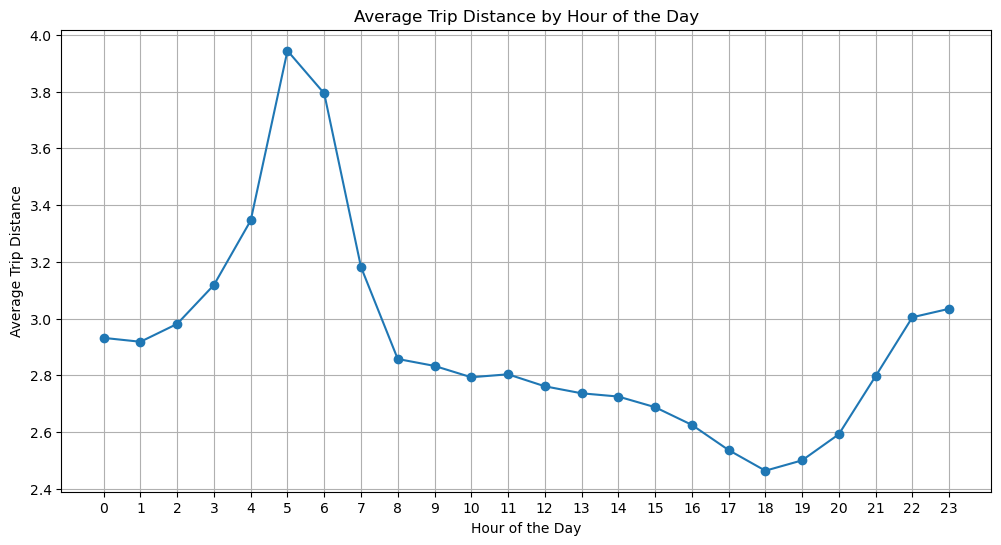

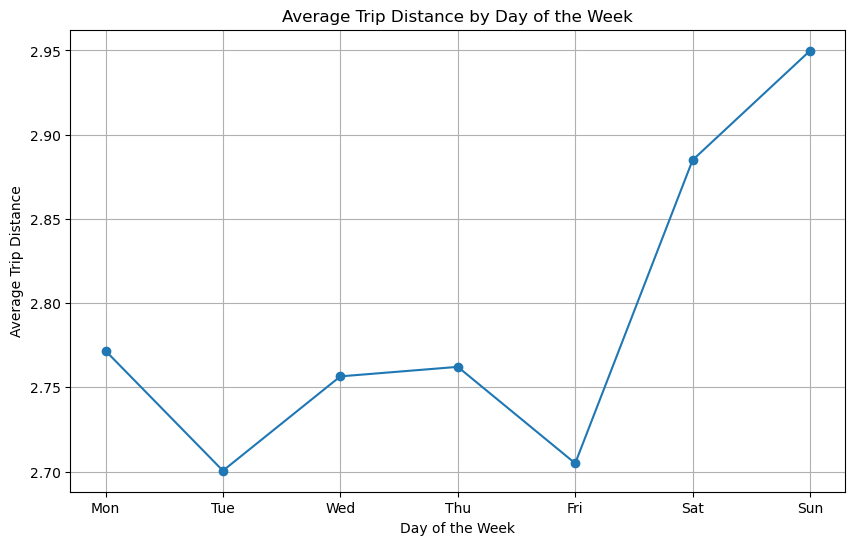

In [12]:
# Calculate average trip distance by hour
average_distance_by_hour = Green_Taxi_To_clean_df.groupby('pickup_hour')['trip_distance'].mean()

# Calculate average trip distance by day of the week
average_distance_by_day = Green_Taxi_To_clean_df.groupby('pickup_day_of_week')['trip_distance'].mean()

# Plotting average distance by hour
plt.figure(figsize=(12, 6))
plt.plot(average_distance_by_hour.index, average_distance_by_hour.values, marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance by Hour of the Day')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Plotting average distance by day of the week
plt.figure(figsize=(10, 6))
plt.plot(average_distance_by_day.index, average_distance_by_day.values, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Distance')
plt.title('Average Trip Distance by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

# Question 2
Which locations have the highest average fare amounts?

In [13]:
average_fare_by_location = Green_Taxi_To_clean_df.groupby('pu_location')['fare_amount'].mean()
top_locations = average_fare_by_location.nlargest(5)  # Get top 5 locations
print(top_locations)

pu_location
EWR,Newark Airport                        86.291667
Queens,Hammels/Arverne                    51.478261
Queens,Rockaway Park                      49.307692
Staten Island,South Beach/Dongan Hills    43.727273
Queens,JFK Airport                        39.461447
Name: fare_amount, dtype: float64


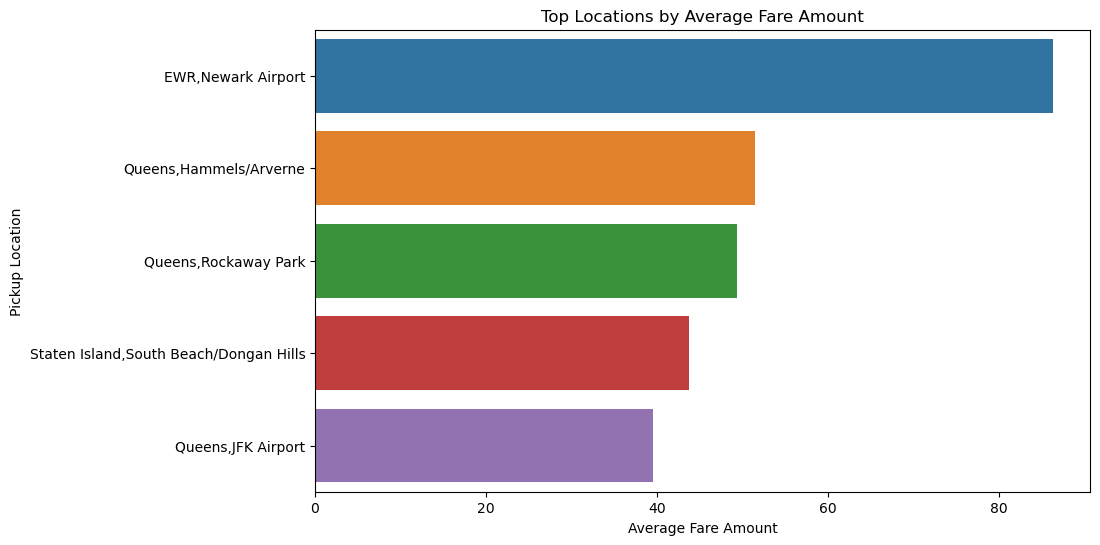

In [14]:
average_fare_by_location = df.groupby('pu_location')['fare_amount'].mean()

# Get top 5 locations with the highest average fare
top_locations = average_fare_by_location.nlargest(5)

# Plotting top locations by average fare
plt.figure(figsize=(10, 6))
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.xlabel('Average Fare Amount')
plt.ylabel('Pickup Location')
plt.title('Top Locations by Average Fare Amount')
plt.show()

# Question 3
what is the relation between the rate type and most pickup loctaion and the avergae Fare per each rate type

In [15]:
Green_Taxi_To_clean_df['rate_type'].unique()

grouped_data = Green_Taxi_To_clean_df.groupby('rate_type')

rate_info_df = pd.DataFrame(columns=['rate_type', 'pu_locations', 'average_fare_amount'])

for rate_type, rate_group in grouped_data:
    
    pickup_locations = rate_group['pu_location'].unique()# Determine the pickup locations for the rate type
    average_fare = rate_group['fare_amount'].mean()# Calculate the average fare amount for the rate type
    
    
    rate_info_df = rate_info_df.append({'rate_type': rate_type, 'pu_locations': pickup_locations,'average_fare_amount': average_fare},ignore_index=True)

mode_rate_type = rate_info_df['rate_type'].mode().iloc[0]
print("Mode Rate Type:", mode_rate_type)
rate_info_df.head(10)

Mode Rate Type: Group ride


C:\Users\merow\AppData\Local\Temp\ipykernel_8808\2002191723.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rate_info_df = rate_info_df.append({'rate_type': rate_type, 'pu_locations': pickup_locations,'average_fare_amount': average_fare},ignore_index=True)
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\2002191723.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rate_info_df = rate_info_df.append({'rate_type': rate_type, 'pu_locations': pickup_locations,'average_fare_amount': average_fare},ignore_index=True)
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\2002191723.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rate_info_df = rate_info_df.append({'rate_type': rate_type, 'pu_locations': pickup_locations,'av

,rate_type,pu_locations,average_fare_amount
0,Group ride,"[Bronx,Melrose South, Queens,Flushing, Brookly...",2.800000
1,JFK,"[Unknown,Unknown, Manhattan,Hamilton Heights, ...",49.044211
2,Nassau or Westchester,"[Queens,Elmhurst, Queens,Jamaica, Queens,Coron...",61.712947
3,Negotiated fare,"[Bronx,University Heights/Morris Heights, Broo...",19.171576
4,Newark,"[Unknown,Unknown, Queens,Flushing, Brooklyn,Do...",55.047468
5,Standard rate,"[Manhattan,Central Park, Manhattan,Morningside...",11.661216


C:\Users\merow\AppData\Local\Temp\ipykernel_8808\553001575.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rate_info_df = rate_info_df.append({'rate_type': rate_type, 'pu_location': pickup_locations,
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\553001575.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rate_info_df = rate_info_df.append({'rate_type': rate_type, 'pu_location': pickup_locations,
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\553001575.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rate_info_df = rate_info_df.append({'rate_type': rate_type, 'pu_location': pickup_locations,
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\553001575.py:10: FutureWarning: The frame.append method is deprecated

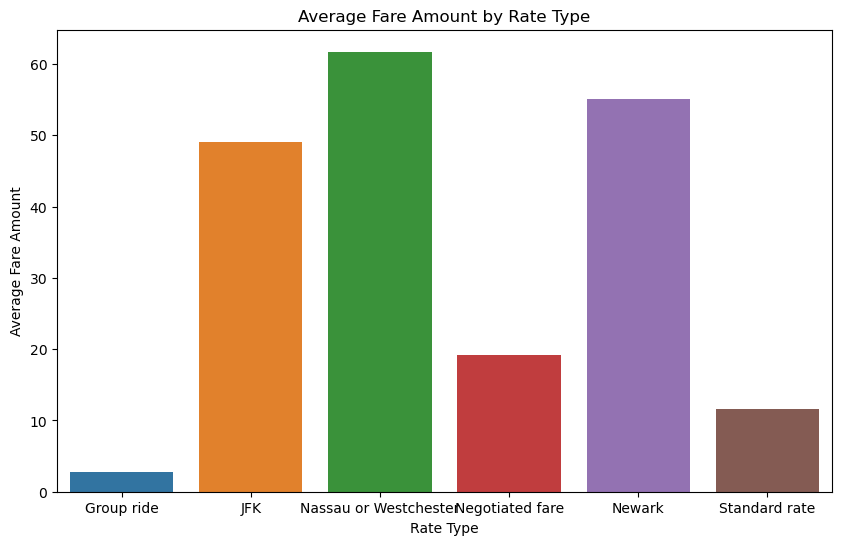

In [16]:
grouped_data = Green_Taxi_To_clean_df.groupby('rate_type')

# Create a DataFrame to store rate information
rate_info_df = pd.DataFrame(columns=['rate_type', 'pu_location', 'average_fare_amount'])

for rate_type, rate_group in grouped_data:
    pickup_locations = ', '.join(rate_group['pu_location'].unique())  # Determine the pickup locations for the rate type
    average_fare = rate_group['fare_amount'].mean()  # Calculate the average fare amount for the rate type
    
    rate_info_df = rate_info_df.append({'rate_type': rate_type, 'pu_location': pickup_locations,
                                        'average_fare_amount': average_fare}, ignore_index=True)

# Plotting average fare amount by rate type
plt.figure(figsize=(10, 6))
sns.barplot(x='rate_type', y='average_fare_amount', data=rate_info_df)
plt.xlabel('Rate Type')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Rate Type')
plt.show()

# Question 4
Rush hour and hot area

In [17]:
Green_Taxi_To_clean_df['pickup_datetime'] = pd.to_datetime(Green_Taxi_To_clean_df['lpep_pickup_datetime'])

Green_Taxi_To_clean_df['pickup_hour'] = Green_Taxi_To_clean_df['pickup_datetime'].dt.hour

hourly_trip_counts = Green_Taxi_To_clean_df['pickup_hour'].value_counts()

rush_hour = Green_Taxi_To_clean_df['pickup_hour'].value_counts().idxmax()
rush_hour_data = Green_Taxi_To_clean_df[Green_Taxi_To_clean_df['pickup_hour'] == rush_hour]

start_time = rush_hour 
if (start_time > 12):
    start_time = start_time-12

end_time = rush_hour + 1 
if (end_time > 12):
    end_time = end_time-12

hot_areas = rush_hour_data['pu_location'].value_counts().nlargest(5)

print("Hot areas during the rush hour:")
print(hot_areas)
print("The rush hour is typically between", start_time, "and", end_time)

Hot areas during the rush hour:
Manhattan,East Harlem North    4490
Manhattan,East Harlem South    3658
Manhattan,Central Harlem       3520
Queens,Astoria                 3015
Queens,Elmhurst                2750
Name: pu_location, dtype: int64
The rush hour is typically between 6 and 7


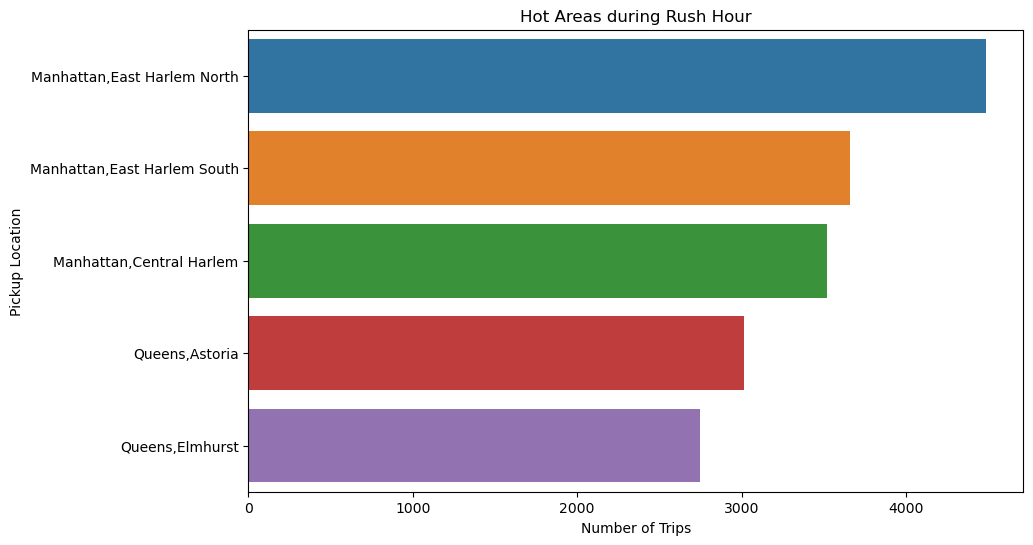

In [18]:
hourly_trip_counts = Green_Taxi_To_clean_df['pickup_hour'].value_counts()

# Identify rush hour (hour with the highest trip count)
rush_hour = hourly_trip_counts.idxmax()

# Filter data for rush hour
rush_hour_data = Green_Taxi_To_clean_df[Green_Taxi_To_clean_df['pickup_hour'] == rush_hour]

# Get the start and end times for rush hour
start_time = rush_hour if rush_hour <= 12 else rush_hour - 12
end_time = start_time + 1 if start_time < 12 else 1

# Calculate the top 5 hot areas during rush hour
hot_areas = rush_hour_data['pu_location'].value_counts().nlargest(5)

# Plotting hot areas during rush hour
plt.figure(figsize=(10, 6))
sns.barplot(x=hot_areas.values, y=hot_areas.index)
plt.xlabel('Number of Trips')
plt.ylabel('Pickup Location')
plt.title('Hot Areas during Rush Hour')
plt.show()

# Question 5
Is there a relationship between the number of passengers and the trip distance? How does this relationship differ for different rate types?

In [19]:
passenger_distance_relationship = Green_Taxi_To_clean_df.groupby(['passenger_count', 'rate_type'])['trip_distance'].mean()
passenger_distance_relationship

passenger_count  rate_type            
1.0              Group ride                2.174444
                 JFK                      12.190770
                 Nassau or Westchester    15.167209
                 Negotiated fare           3.303773
                 Newark                   13.685080
                 Standard rate             2.720515
2.0              JFK                      10.211130
                 Nassau or Westchester    17.899412
                 Negotiated fare           4.162705
                 Newark                   10.118367
                 Standard rate             2.851471
3.0              JFK                      14.285897
                 Nassau or Westchester    16.014545
                 Negotiated fare           4.667063
                 Newark                   17.087273
                 Standard rate             2.956077
4.0              Group ride                0.000000
                 JFK                      12.379091
                 Nassau o

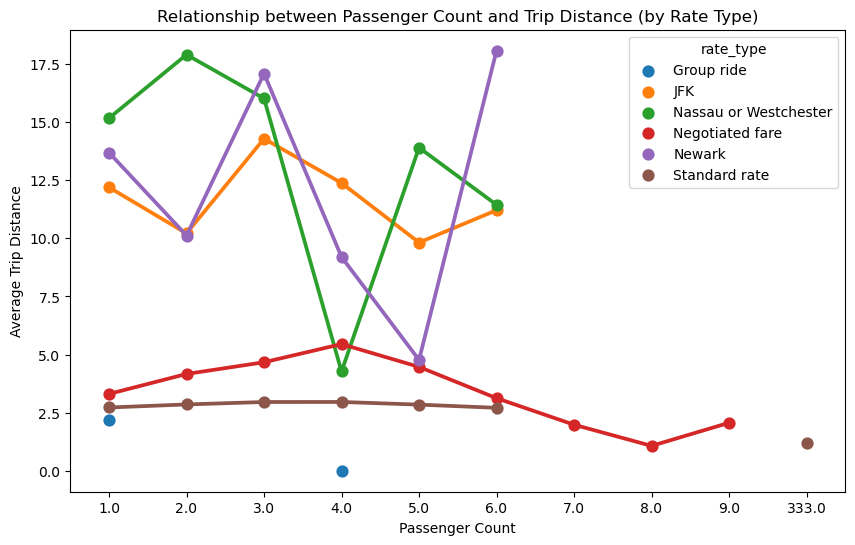

In [20]:
# Group data by passenger count and rate type, calculate average trip distance
passenger_distance_relationship = Green_Taxi_To_clean_df.groupby(['passenger_count', 'rate_type'])['trip_distance'].mean().reset_index()

# Plotting passenger count vs. trip distance
plt.figure(figsize=(10, 6))
sns.pointplot(x='passenger_count', y='trip_distance', hue='rate_type', data=passenger_distance_relationship)
plt.xlabel('Passenger Count')
plt.ylabel('Average Trip Distance')
plt.title('Relationship between Passenger Count and Trip Distance (by Rate Type)')
plt.show()

# Question 6
how many unknowns pick up and drop off and 

In [21]:
Unknown_po = Green_Taxi_To_clean_df[Green_Taxi_To_clean_df['pu_location'] == 'Unknown,Unknown']
Unknown_po['pu_location'].count()

257

In [22]:
Unknown_po.head(10)

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week
144,VeriFone Inc.,2017-08-01 00:00:00,2017-08-01 00:00:00,N,Standard rate,"Unknown,Unknown","Brooklyn,East New York",1.0,17.30,96.0,...,0.0,NaN,0.3,96.8,Cash,Street-hail,NaN,2017-08-01 00:00:00,0,1
619,"Creative Mobile Technologies, LLC",2017-08-01 01:57:52,2017-08-01 01:58:44,N,Newark,"Unknown,Unknown","Unknown,Unknown",1.0,20.70,20.0,...,0.0,NaN,0.3,20.8,No charge,Street-hail,NaN,2017-08-01 01:57:52,1,1
620,"Creative Mobile Technologies, LLC",2017-08-01 01:59:39,2017-08-01 02:00:35,N,Newark,"Unknown,Unknown","Unknown,Unknown",1.0,20.70,20.0,...,0.0,NaN,0.3,20.8,No charge,Street-hail,NaN,2017-08-01 01:59:39,1,1
1025,"Creative Mobile Technologies, LLC",2017-08-01 02:01:13,2017-08-01 02:01:29,N,JFK,"Unknown,Unknown","Unknown,Unknown",1.0,20.70,52.0,...,0.0,NaN,0.3,68.6,Credit card,Street-hail,NaN,2017-08-01 02:01:13,2,1
8589,VeriFone Inc.,2017-08-01 12:42:29,2017-08-01 13:40:38,N,Standard rate,"Unknown,Unknown","Brooklyn,Sunset Park East",1.0,22.36,62.0,...,0.0,NaN,0.3,62.8,Cash,Street-hail,NaN,2017-08-01 12:42:29,12,1
15466,"Creative Mobile Technologies, LLC",2017-08-01 17:03:21,2017-08-01 17:03:29,N,Standard rate,"Unknown,Unknown","Unknown,Unknown",1.0,17.30,2.5,...,0.0,NaN,0.3,4.3,Dispute,Street-hail,NaN,2017-08-01 17:03:21,17,1
22071,VeriFone Inc.,2017-08-01 20:31:51,2017-08-01 20:32:11,N,Negotiated fare,"Unknown,Unknown","Unknown,Unknown",1.0,0.00,25.0,...,0.0,NaN,0.0,25.0,Credit card,Dispatch,NaN,2017-08-01 20:31:51,20,1
23960,VeriFone Inc.,2017-08-01 22:12:53,2017-08-01 22:13:24,N,Negotiated fare,"Unknown,Unknown","Unknown,Unknown",1.0,0.00,80.0,...,0.0,NaN,0.0,88.0,Credit card,Dispatch,NaN,2017-08-01 22:12:53,22,1
27090,VeriFone Inc.,2017-08-02 01:23:34,2017-08-02 01:23:37,N,Negotiated fare,"Unknown,Unknown","Unknown,Unknown",1.0,0.00,6.0,...,0.0,NaN,0.0,6.0,Credit card,Dispatch,NaN,2017-08-02 01:23:34,1,2
27647,VeriFone Inc.,2017-08-02 02:04:57,2017-08-02 02:05:00,N,Negotiated fare,"Unknown,Unknown","Unknown,Unknown",2.0,0.00,35.0,...,0.0,NaN,0.0,35.0,Credit card,Dispatch,NaN,2017-08-02 02:04:57,2,2


In [23]:
Unknown_do = Green_Taxi_To_clean_df[Green_Taxi_To_clean_df['do_location'] == 'Unknown,Unknown']
Unknown_do['do_location'].count()

1889

In [24]:
Unknown_do.head(10)

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week
241,VeriFone Inc.,2017-08-01 00:09:06,2017-08-01 01:23:43,N,Negotiated fare,"Manhattan,East Harlem North","Unknown,Unknown",1.0,20.98,40.0,...,0.0,NaN,0.0,40.00,Cash,Dispatch,NaN,2017-08-01 00:09:06,0,1
619,"Creative Mobile Technologies, LLC",2017-08-01 01:57:52,2017-08-01 01:58:44,N,Newark,"Unknown,Unknown","Unknown,Unknown",1.0,20.70,20.0,...,0.0,NaN,0.3,20.80,No charge,Street-hail,NaN,2017-08-01 01:57:52,1,1
620,"Creative Mobile Technologies, LLC",2017-08-01 01:59:39,2017-08-01 02:00:35,N,Newark,"Unknown,Unknown","Unknown,Unknown",1.0,20.70,20.0,...,0.0,NaN,0.3,20.80,No charge,Street-hail,NaN,2017-08-01 01:59:39,1,1
633,VeriFone Inc.,2017-08-01 01:49:42,2017-08-01 02:05:04,N,Nassau or Westchester,"Queens,Jamaica","Unknown,Unknown",1.0,9.36,29.5,...,0.0,NaN,0.3,36.96,Credit card,Street-hail,NaN,2017-08-01 01:49:42,1,1
1025,"Creative Mobile Technologies, LLC",2017-08-01 02:01:13,2017-08-01 02:01:29,N,JFK,"Unknown,Unknown","Unknown,Unknown",1.0,20.70,52.0,...,0.0,NaN,0.3,68.60,Credit card,Street-hail,NaN,2017-08-01 02:01:13,2,1
1845,VeriFone Inc.,2017-08-01 05:15:02,2017-08-01 05:41:25,N,Nassau or Westchester,"Queens,Jamaica","Unknown,Unknown",1.0,24.84,101.0,...,0.0,NaN,0.3,102.30,Cash,Street-hail,NaN,2017-08-01 05:15:02,5,1
2100,VeriFone Inc.,2017-08-01 06:31:19,2017-08-01 07:02:10,N,Negotiated fare,"Queens,Flushing","Unknown,Unknown",1.0,13.94,55.0,...,0.0,NaN,0.0,60.00,Credit card,Dispatch,NaN,2017-08-01 06:31:19,6,1
2647,"Creative Mobile Technologies, LLC",2017-08-01 07:09:37,2017-08-01 07:21:22,N,Standard rate,"Manhattan,Inwood","Unknown,Unknown",1.0,7.10,21.0,...,0.0,NaN,0.3,21.80,Cash,Street-hail,NaN,2017-08-01 07:09:37,7,1
2933,VeriFone Inc.,2017-08-01 07:10:06,2017-08-01 07:34:54,N,Newark,"Brooklyn,Boerum Hill","Unknown,Unknown",1.0,6.02,39.5,...,12.5,NaN,0.3,64.71,Credit card,Street-hail,NaN,2017-08-01 07:10:06,7,1
3106,VeriFone Inc.,2017-08-01 07:28:23,2017-08-01 08:04:04,N,Standard rate,"Queens,Jamaica","Unknown,Unknown",1.0,8.79,31.0,...,0.0,NaN,0.3,38.16,Credit card,Street-hail,NaN,2017-08-01 07:28:23,7,1


In [25]:
Unknown = Unknown_po[Unknown_po['do_location'] == 'Unknown,Unknown']
Unknown['do_location'].count()

184

In [26]:
Unknown.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week
619,"Creative Mobile Technologies, LLC",2017-08-01 01:57:52,2017-08-01 01:58:44,N,Newark,"Unknown,Unknown","Unknown,Unknown",1.0,20.7,20.0,...,0.0,NaN,0.3,20.8,No charge,Street-hail,NaN,2017-08-01 01:57:52,1,1
620,"Creative Mobile Technologies, LLC",2017-08-01 01:59:39,2017-08-01 02:00:35,N,Newark,"Unknown,Unknown","Unknown,Unknown",1.0,20.7,20.0,...,0.0,NaN,0.3,20.8,No charge,Street-hail,NaN,2017-08-01 01:59:39,1,1
1025,"Creative Mobile Technologies, LLC",2017-08-01 02:01:13,2017-08-01 02:01:29,N,JFK,"Unknown,Unknown","Unknown,Unknown",1.0,20.7,52.0,...,0.0,NaN,0.3,68.6,Credit card,Street-hail,NaN,2017-08-01 02:01:13,2,1
15466,"Creative Mobile Technologies, LLC",2017-08-01 17:03:21,2017-08-01 17:03:29,N,Standard rate,"Unknown,Unknown","Unknown,Unknown",1.0,17.3,2.5,...,0.0,NaN,0.3,4.3,Dispute,Street-hail,NaN,2017-08-01 17:03:21,17,1
22071,VeriFone Inc.,2017-08-01 20:31:51,2017-08-01 20:32:11,N,Negotiated fare,"Unknown,Unknown","Unknown,Unknown",1.0,0.0,25.0,...,0.0,NaN,0.0,25.0,Credit card,Dispatch,NaN,2017-08-01 20:31:51,20,1


# Question 7
what is the average duration per day

In [42]:
def convert_duration_to_seconds(df, duration_column):
    # Split duration into hours, minutes, and seconds
    hours = df[duration_column].dt.hour
    minutes = df[duration_column].dt.minute
    seconds = df[duration_column].dt.second
    duration_seconds = (hours * 3600) + (minutes * 60) + seconds
    df['duration_seconds'] = duration_seconds

convert_duration_to_seconds(Df_1, 'duration')

In [27]:
def calculate_duration(row):
    pickup_time = datetime.strptime(row['lpep_pickup_datetime'], '%Y-%m-%d %H:%M:%S')
    dropoff_time = datetime.strptime(row['lpep_dropoff_datetime'], '%Y-%m-%d %H:%M:%S')
    duration = dropoff_time - pickup_time
    duration_str = str(duration).split(", ")[-1]
    return duration_str
Green_Taxi_To_clean_df['duration'] = Green_Taxi_To_clean_df.apply(calculate_duration, axis=1)
Green_Taxi_To_clean_df.head(10)

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration
0,VeriFone Inc.,2017-08-01 00:21:35,2017-08-01 00:27:59,N,Standard rate,"Manhattan,Central Park","Manhattan,Upper West Side North",1.0,1.43,7.0,...,NaN,0.3,9.96,Credit card,Street-hail,NaN,2017-08-01 00:21:35,0,1,0:06:24
1,VeriFone Inc.,2017-08-01 00:37:27,2017-08-01 00:39:02,N,Standard rate,"Manhattan,Morningside Heights","Manhattan,Morningside Heights",1.0,0.44,3.5,...,NaN,0.3,4.80,Cash,Street-hail,NaN,2017-08-01 00:37:27,0,1,0:01:35
2,VeriFone Inc.,2017-08-01 00:04:03,2017-08-01 00:05:45,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",1.0,0.32,3.5,...,NaN,0.3,4.80,Cash,Street-hail,NaN,2017-08-01 00:04:03,0,1,0:01:42
3,VeriFone Inc.,2017-08-01 00:05:23,2017-08-01 00:09:20,N,Standard rate,"Manhattan,Central Park","Manhattan,Upper West Side North",2.0,1.12,5.5,...,NaN,0.3,8.16,Credit card,Street-hail,NaN,2017-08-01 00:05:23,0,1,0:03:57
4,VeriFone Inc.,2017-08-01 00:29:09,2017-08-01 00:34:44,N,Standard rate,"Manhattan,Bloomingdale","Manhattan,Central Harlem",2.0,1.05,6.0,...,NaN,0.3,7.30,Cash,Street-hail,NaN,2017-08-01 00:29:09,0,1,0:05:35
5,VeriFone Inc.,2017-08-01 00:39:54,2017-08-01 00:53:04,N,Standard rate,"Queens,Flushing","Queens,Kew Gardens Hills",1.0,2.94,12.0,...,NaN,0.3,13.30,Credit card,Street-hail,NaN,2017-08-01 00:39:54,0,1,0:13:10
6,VeriFone Inc.,2017-08-01 00:15:08,2017-08-01 00:39:26,N,Standard rate,"Queens,Sunnyside","Queens,Kew Gardens",1.0,9.88,28.0,...,NaN,0.3,35.16,Credit card,Street-hail,NaN,2017-08-01 00:15:08,0,1,0:24:18
7,"Creative Mobile Technologies, LLC",2017-08-01 00:01:56,2017-08-01 00:09:15,N,Standard rate,"Manhattan,East Harlem South","Manhattan,Lenox Hill West",1.0,1.70,8.0,...,NaN,0.3,11.15,Credit card,Street-hail,NaN,2017-08-01 00:01:56,0,1,0:07:19
8,VeriFone Inc.,2017-08-01 00:38:24,2017-08-01 01:02:49,N,Standard rate,"Brooklyn,Downtown Brooklyn/MetroTech","Brooklyn,Flatbush/Ditmas Park",2.0,5.04,19.5,...,NaN,0.3,20.80,Cash,Street-hail,NaN,2017-08-01 00:38:24,0,1,0:24:25
9,"Creative Mobile Technologies, LLC",2017-08-01 00:56:13,2017-08-01 01:19:08,N,Standard rate,"Queens,Astoria","Manhattan,Greenwich Village South",1.0,9.90,30.0,...,NaN,0.3,31.30,Cash,Street-hail,NaN,2017-08-01 00:56:13,0,1,0:22:55


In [28]:
Green_Taxi_To_clean_df['duration'].describe()

count      867421
unique       9029
top       0:06:30
freq         1278
Name: duration, dtype: object

In [41]:
Df_1 = Green_Taxi_To_clean_df

In [48]:
average_duration = Df_1['duration_seconds'].mean()
highest_duration = Df_1['duration_seconds'].max()
average_duration

1188.7932330437009

In [408]:
average_duration_per_day = df.groupby('pickup_day_of_week')['duration_seconds'].mean()

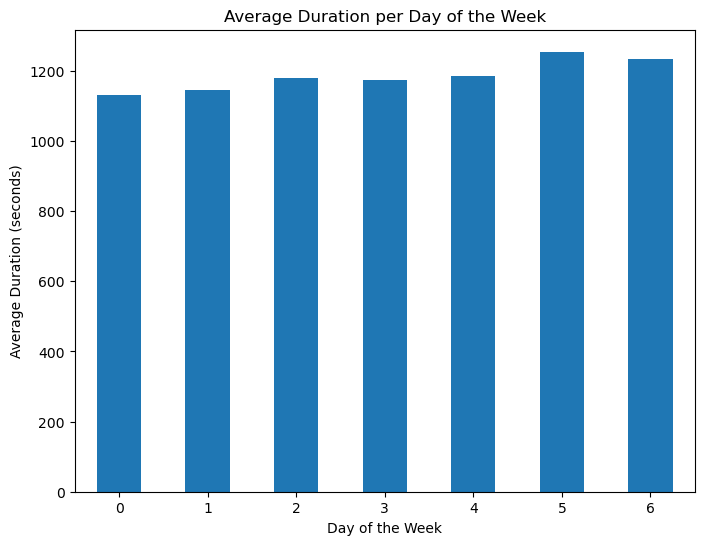

In [409]:
average_duration_per_day.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Day of the Week')
plt.ylabel('Average Duration (seconds)')
plt.title('Average Duration per Day of the Week')
plt.xticks(rotation=0)
plt.show()

# Question 8
How does the average fare amount vary based on the trip distance and rate type?

In [56]:
average_fare_by_distance_rate = Green_Taxi_To_clean_df.groupby(['trip_distance', 'rate_type'])['fare_amount'].mean().reset_index()

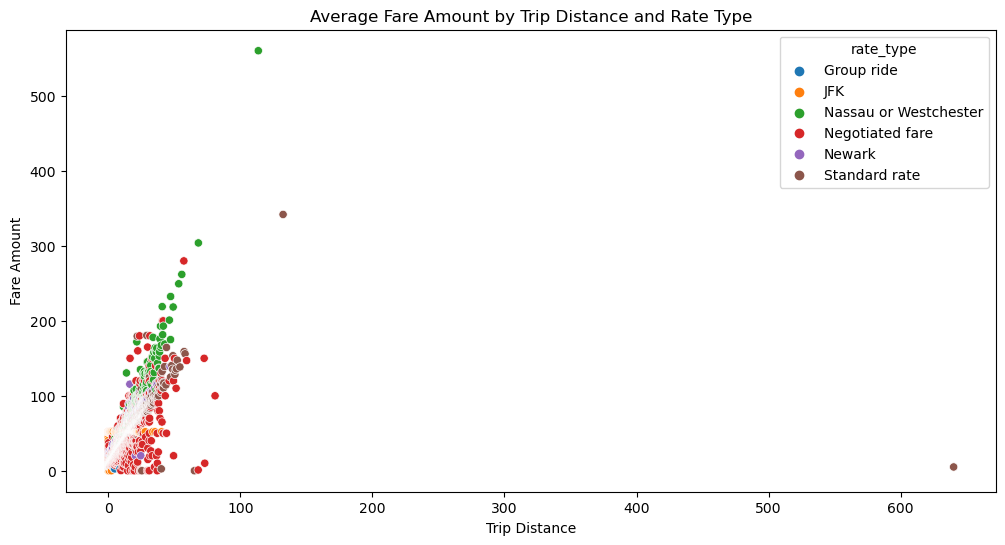

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', hue='rate_type', data=average_fare_by_distance_rate)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Average Fare Amount by Trip Distance and Rate Type')
plt.show()

# Question 9
What is the distribution of trip distances for each day of the week?

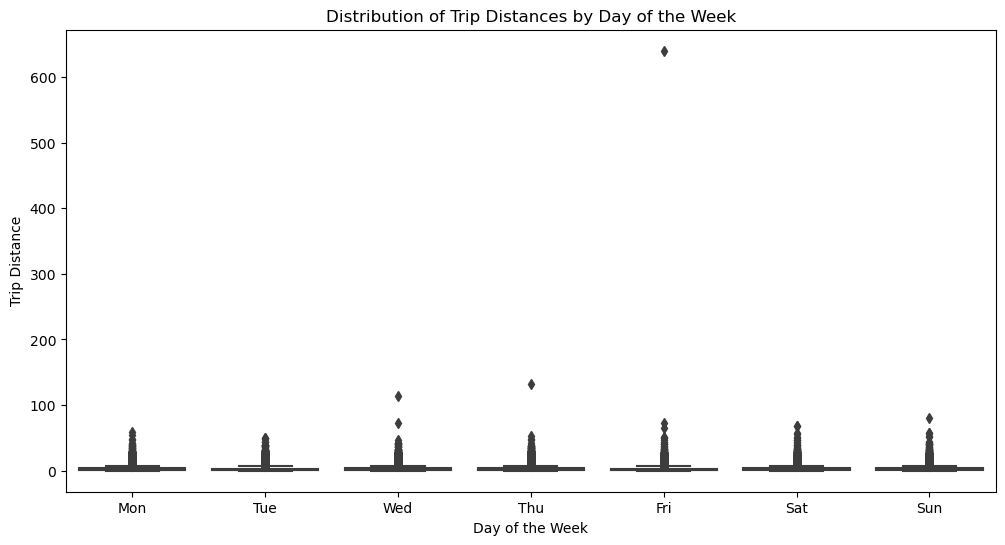

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='pickup_day_of_week', y='trip_distance', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Trip Distance')
plt.title('Distribution of Trip Distances by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

# Question 10
How does the average fare amount vary based on the pickup location and payment type?

In [61]:
Green_Taxi_To_clean_df.columns

Index(['vendor', 'lpep_pickup_datetime', 'lpep_dropoff_datetime',
       'store_and_fwd_flag', 'rate_type', 'pu_location', 'do_location',
       'passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'ehail_fee', 'improvement_surcharge',
       'total_amount', 'payment_type', 'trip_type', 'congestion_surcharge',
       'pickup_datetime', 'pickup_hour', 'pickup_day_of_week', 'duration',
       'duration_seconds'],
      dtype='object')

In [75]:
average_fare_by_location_payment = Green_Taxi_To_clean_df.groupby(['pu_location', 'payment_type'])['fare_amount'].mean().reset_index()
top_10_highest_fare = average_fare_by_location_payment.nlargest(20, 'fare_amount')

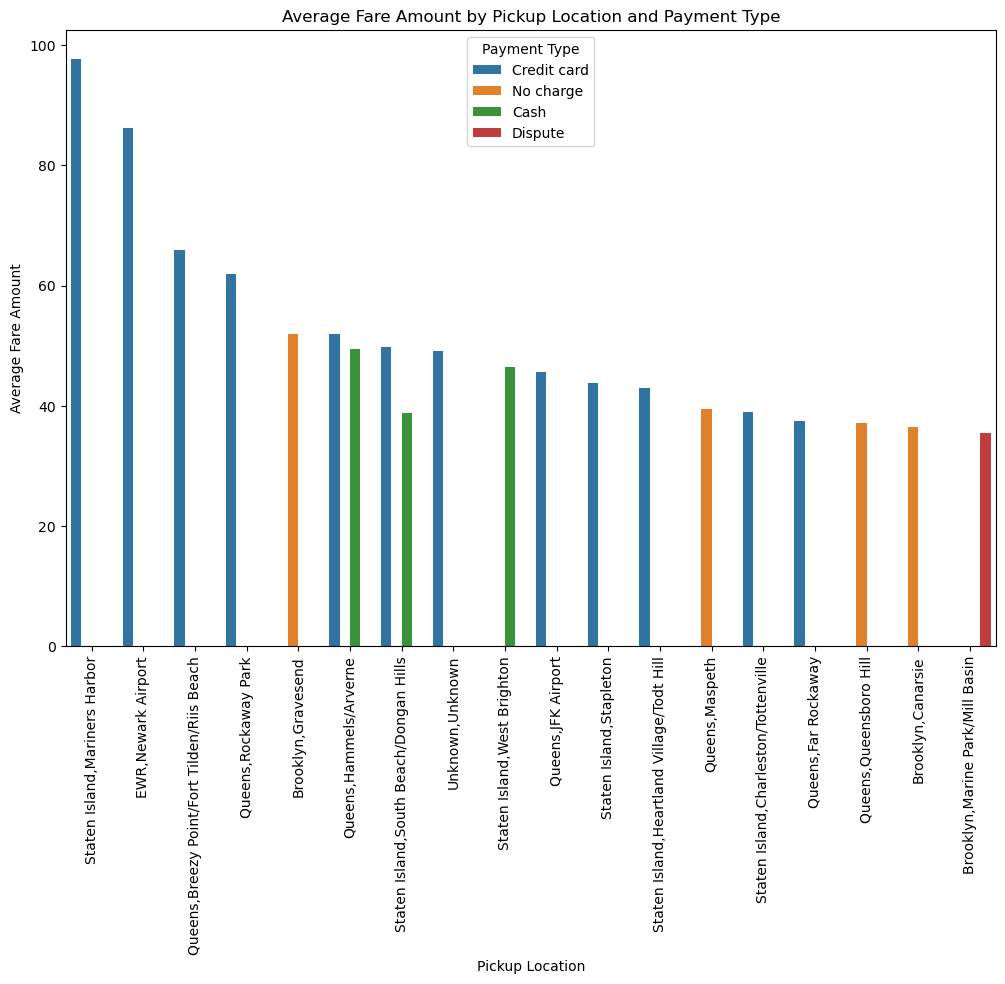

In [76]:
plt.figure(figsize=(12, 8))
sns.barplot(x='pu_location', y='fare_amount', hue='payment_type', data=top_10_highest_fare)
plt.xlabel('Pickup Location')
plt.ylabel('Average Fare Amount')
plt.title('Average Fare Amount by Pickup Location and Payment Type')
plt.xticks(rotation=90)
plt.legend(title='Payment Type')
plt.show()

# Question 11
How does the trip distance vary throughout the day for different passenger counts?

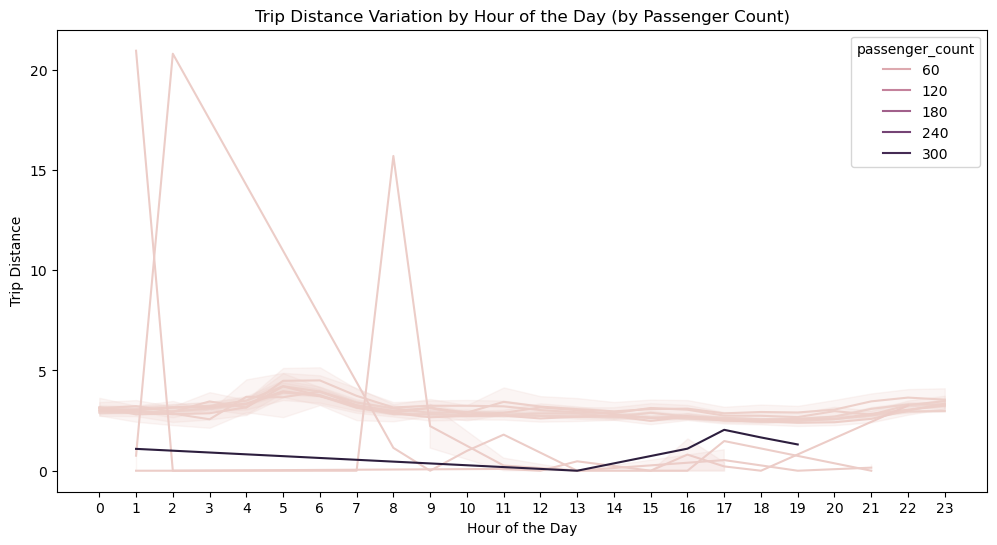

In [77]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_hour', y='trip_distance', hue='passenger_count', data=Green_Taxi_To_clean_df)
plt.xlabel('Hour of the Day')
plt.ylabel('Trip Distance')
plt.title('Trip Distance Variation by Hour of the Day (by Passenger Count)')
plt.xticks(range(24))
plt.show()

# Question 12
What is the correlation between trip distance, fare amount, and duration?

In [78]:
correlation_data = df[['trip_distance', 'fare_amount', 'duration']]
correlation_matrix = correlation_data.corr()

C:\Users\merow\AppData\Local\Temp\ipykernel_8808\2666690763.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = correlation_data.corr()


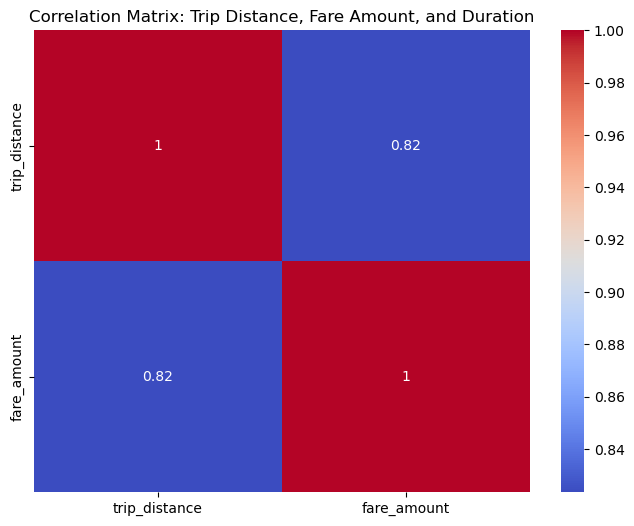

In [79]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix: Trip Distance, Fare Amount, and Duration')
plt.show()

# Question 13
why is the Congestion Surcharge without value and the ehail

because the data i have access to is for the year 2017 so the Congestion Surcharge and e-hail are MNAR because it appeared in the year of 2019 and also as the e-hail fees as it was introduced later in 2018

# 3 - Cleaning Data

## Observe inconsistent data

In [85]:
Green_Taxi_To_clean_df.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,congestion_surcharge,pickup_hour,pickup_day_of_week,duration_seconds
count,867317.000000,867421.000000,867421.000000,463064.000000,867421.000000,867421.000000,867421.000000,0.0,867421.000000,867421.000000,0.0,867421.000000,867421.000000,867421.000000
mean,1.368259,2.789652,11.940598,0.679438,0.487533,1.148123,0.110782,NaN,0.292795,14.501498,NaN,13.753477,3.090681,1188.793233
std,1.360688,2.979887,9.862812,0.271881,0.084610,2.118295,0.876360,NaN,0.050004,11.247089,NaN,6.482192,1.918218,5861.210989
min,1.000000,0.000000,-470.000000,-4.500000,-0.500000,-10.000000,0.000000,NaN,-0.300000,-470.000000,NaN,0.000000,0.000000,0.000000
25%,1.000000,1.020000,6.500000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,7.850000,NaN,9.000000,1.000000,360.000000
50%,1.000000,1.810000,9.000000,0.500000,0.500000,0.000000,0.000000,NaN,0.300000,11.300000,NaN,15.000000,3.000000,601.000000
75%,1.000000,3.460000,14.500000,1.000000,0.500000,1.960000,0.000000,NaN,0.300000,17.300000,NaN,19.000000,5.000000,988.000000
max,333.000000,640.000000,2047.000000,10.800000,0.500000,446.790000,90.500000,NaN,0.300000,2047.800000,NaN,23.000000,6.000000,86398.000000


In [86]:
Green_Taxi_To_clean_df.payment_type.value_counts()

Credit card    421181
Cash           413038
No charge        3813
Dispute          2155
Uknown             23
Name: payment_type, dtype: int64

In [87]:
Green_Taxi_To_clean_df.passenger_count.value_counts(),Green_Taxi_To_clean_df.passenger_count.isnull().sum()

(1.0      729809
 2.0       71017
 5.0       29571
 6.0       16317
 3.0       15467
 4.0        5081
 8.0          22
 7.0          14
 9.0          13
 333.0         6
 Name: passenger_count, dtype: int64,
 104)

In [88]:
Green_Taxi_To_clean_df.extra.value_counts()

 0.5     295875
 1.0     165707
-0.5        744
 4.5        374
-1.0        330
 0.2         25
-4.5          5
 0.6          1
 3.4          1
 10.8         1
 0.4          1
Name: extra, dtype: int64

In [91]:
fare = Green_Taxi_To_clean_df[Green_Taxi_To_clean_df['fare_amount'] <= 0]
fare.fare_amount.value_counts()

0.0    1970
Name: fare_amount, dtype: int64

In [90]:
Green_Taxi_To_clean_df['fare_amount']=Green_Taxi_To_clean_df['fare_amount'].abs()
Green_Taxi_To_clean_df['extra']=Green_Taxi_To_clean_df['extra'].abs()
Green_Taxi_To_clean_df['mta_tax']=Green_Taxi_To_clean_df['mta_tax'].abs()
Green_Taxi_To_clean_df['tip_amount']=Green_Taxi_To_clean_df['tip_amount'].abs()
Green_Taxi_To_clean_df['improvement_surcharge']=Green_Taxi_To_clean_df['improvement_surcharge'].abs()
Green_Taxi_To_clean_df['total_amount']=Green_Taxi_To_clean_df['total_amount'].abs()

# Extra


In [92]:
Green_Taxi_To_clean_df.drop(Green_Taxi_To_clean_df[Green_Taxi_To_clean_df['extra'] > 1].index)
Green_Taxi_To_clean_df.extra.value_counts()

0.5     296619
1.0     166037
4.5        379
0.2         25
0.6          1
3.4          1
10.8         1
0.4          1
Name: extra, dtype: int64

In [93]:
Unknown.head(5)

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week
619,"Creative Mobile Technologies, LLC",2017-08-01 01:57:52,2017-08-01 01:58:44,N,Newark,"Unknown,Unknown","Unknown,Unknown",1.0,20.7,20.0,...,0.0,NaN,0.3,20.8,No charge,Street-hail,NaN,2017-08-01 01:57:52,1,1
620,"Creative Mobile Technologies, LLC",2017-08-01 01:59:39,2017-08-01 02:00:35,N,Newark,"Unknown,Unknown","Unknown,Unknown",1.0,20.7,20.0,...,0.0,NaN,0.3,20.8,No charge,Street-hail,NaN,2017-08-01 01:59:39,1,1
1025,"Creative Mobile Technologies, LLC",2017-08-01 02:01:13,2017-08-01 02:01:29,N,JFK,"Unknown,Unknown","Unknown,Unknown",1.0,20.7,52.0,...,0.0,NaN,0.3,68.6,Credit card,Street-hail,NaN,2017-08-01 02:01:13,2,1
15466,"Creative Mobile Technologies, LLC",2017-08-01 17:03:21,2017-08-01 17:03:29,N,Standard rate,"Unknown,Unknown","Unknown,Unknown",1.0,17.3,2.5,...,0.0,NaN,0.3,4.3,Dispute,Street-hail,NaN,2017-08-01 17:03:21,17,1
22071,VeriFone Inc.,2017-08-01 20:31:51,2017-08-01 20:32:11,N,Negotiated fare,"Unknown,Unknown","Unknown,Unknown",1.0,0.0,25.0,...,0.0,NaN,0.0,25.0,Credit card,Dispatch,NaN,2017-08-01 20:31:51,20,1


# Rate Type
Group rides with 1 passanger and the rides which contains 333 passengers 

In [97]:
Group_ride = Green_Taxi_To_clean_df.loc[Green_Taxi_To_clean_df.rate_type == "Group ride"]

In [98]:
Group_ride = Group_ride.loc[Group_ride.passenger_count == 1]
Group_ride

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
10138,"Creative Mobile Technologies, LLC",2017-08-01 13:20:40,2017-08-01 13:20:53,N,Group ride,"Bronx,Melrose South","Bronx,Melrose South",1.0,0.00,2.5,...,0.3,3.3,Cash,Street-hail,NaN,2017-08-01 13:20:40,13,1,2023-10-26 00:00:13,13
114832,"Creative Mobile Technologies, LLC",2017-08-04 23:01:13,2017-08-04 23:01:17,N,Group ride,"Queens,Flushing","Queens,Flushing",1.0,4.60,2.5,...,0.3,3.3,Cash,Street-hail,NaN,2017-08-04 23:01:13,23,4,2023-10-26 00:00:04,4
182921,VeriFone Inc.,2017-08-07 09:24:53,2017-08-07 09:55:18,N,Group ride,"Brooklyn,Coney Island","Brooklyn,Brighton Beach",1.0,4.97,2.5,...,0.3,3.3,Cash,Street-hail,NaN,2017-08-07 09:24:53,9,0,2023-10-26 00:30:25,1825
265811,VeriFone Inc.,2017-08-10 14:01:23,2017-08-10 14:01:42,N,Group ride,"Bronx,Van Cortlandt Village","Bronx,Van Cortlandt Village",1.0,0.00,5.5,...,0.3,6.3,Cash,Street-hail,NaN,2017-08-10 14:01:23,14,3,2023-10-26 00:00:19,19
429110,"Creative Mobile Technologies, LLC",2017-08-16 09:31:13,2017-08-16 09:32:32,N,Group ride,"Bronx,Mott Haven/Port Morris","Bronx,Mott Haven/Port Morris",1.0,0.30,2.5,...,0.3,3.3,Cash,Street-hail,NaN,2017-08-16 09:31:13,9,2,2023-10-26 00:01:19,79
470978,"Creative Mobile Technologies, LLC",2017-08-17 19:53:28,2017-08-17 19:54:17,N,Group ride,"Bronx,East Tremont","Bronx,East Tremont",1.0,0.80,2.5,...,0.3,3.3,Cash,Street-hail,NaN,2017-08-17 19:53:28,19,3,2023-10-26 00:00:49,49
604635,"Creative Mobile Technologies, LLC",2017-08-22 14:36:48,2017-08-22 14:36:57,N,Group ride,"Bronx,Melrose South","Bronx,Melrose South",1.0,0.00,2.5,...,0.3,3.3,Cash,Street-hail,NaN,2017-08-22 14:36:48,14,1,2023-10-26 00:00:09,9
763588,"Creative Mobile Technologies, LLC",2017-08-27 22:35:58,2017-08-27 22:36:11,N,Group ride,"Brooklyn,Williamsburg (South Side)","Brooklyn,Williamsburg (South Side)",1.0,0.00,2.5,...,0.3,3.3,Cash,Street-hail,NaN,2017-08-27 22:35:58,22,6,2023-10-26 00:00:13,13
779054,"Creative Mobile Technologies, LLC",2017-08-28 16:08:49,2017-08-28 16:08:56,N,Group ride,"Manhattan,Washington Heights North","Manhattan,Washington Heights North",1.0,8.90,2.5,...,0.3,3.3,No charge,Street-hail,NaN,2017-08-28 16:08:49,16,0,2023-10-26 00:00:07,7


In [99]:
irrelevent_ride = Green_Taxi_To_clean_df.loc[Green_Taxi_To_clean_df.passenger_count == 333]
irrelevent_ride

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
9766,VeriFone Inc.,2017-08-01 13:40:26,2017-08-01 13:40:41,N,Standard rate,"Queens,Kew Gardens Hills","Queens,Kew Gardens Hills",333.0,0.00,2.5,...,0.3,3.3,Cash,Street-hail,NaN,2017-08-01 13:40:26,13,1,2023-10-26 00:00:15,15
27224,VeriFone Inc.,2017-08-02 01:24:16,2017-08-02 01:31:24,N,Standard rate,"Queens,Forest Hills","Queens,Kew Gardens Hills",333.0,1.09,7.0,...,0.3,8.3,Credit card,Street-hail,NaN,2017-08-02 01:24:16,1,2,2023-10-26 00:07:08,428
42576,VeriFone Inc.,2017-08-02 17:27:00,2017-08-02 17:41:02,N,Standard rate,"Queens,Forest Hills","Queens,Kew Gardens Hills",333.0,2.04,10.5,...,0.3,12.3,Cash,Street-hail,NaN,2017-08-02 17:27:00,17,2,2023-10-26 00:14:02,842
44963,VeriFone Inc.,2017-08-02 18:17:31,2017-08-02 18:25:34,N,Standard rate,"Queens,Kew Gardens","Queens,Kew Gardens Hills",333.0,1.66,7.5,...,0.3,9.3,Cash,Street-hail,NaN,2017-08-02 18:17:31,18,2,2023-10-26 00:08:03,483
48304,VeriFone Inc.,2017-08-02 19:07:26,2017-08-02 19:13:37,N,Standard rate,"Queens,Forest Hills","Queens,Kew Gardens Hills",333.0,1.31,6.5,...,0.3,8.3,Cash,Street-hail,NaN,2017-08-02 19:07:26,19,2,2023-10-26 00:06:11,371
69036,VeriFone Inc.,2017-08-03 16:18:01,2017-08-03 16:23:50,N,Standard rate,"Queens,Forest Hills","Queens,Kew Gardens Hills",333.0,1.10,6.0,...,0.3,7.8,Cash,Street-hail,NaN,2017-08-03 16:18:01,16,3,2023-10-26 00:05:49,349


In [100]:
indices_to_delete_1 = Group_ride.index
Green_Taxi_To_clean_df = Green_Taxi_To_clean_df.drop(indices_to_delete_1)

# Dublicates
checking if there are duplicates and droping them

In [95]:
df_dummy = df
duplicates = df_dummy[df_dummy.duplicated()]
df_dummy.duplicated().sum()

43

In [96]:
Green_Taxi_To_clean_df = df_dummy.drop_duplicates()

# Pickup location and Dropoff location
droping the trips which has no pick up and no drop off location

In [101]:
indices_to_delete = Unknown.index
Green_Taxi_To_clean_df = Green_Taxi_To_clean_df.drop(indices_to_delete)

# Trip Duration 

In [112]:
duration_cond=Green_Taxi_To_clean_df.loc[Green_Taxi_To_clean_df.duration_seconds == 0]
duration_cond.head(5)

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
22,VeriFone Inc.,2017-08-01 00:08:29,2017-08-01 00:08:29,N,Standard rate,"Brooklyn,Williamsburg (North Side)","Brooklyn,Park Slope",1.0,6.04,21.0,...,0.3,26.76,Credit card,Street-hail,NaN,2017-08-01 00:08:29,0,1,2023-10-26,0
144,VeriFone Inc.,2017-08-01 00:00:00,2017-08-01 00:00:00,N,Standard rate,"Unknown,Unknown","Brooklyn,East New York",1.0,17.30,96.0,...,0.3,96.80,Cash,Street-hail,NaN,2017-08-01 00:00:00,0,1,2023-10-26,0
315,VeriFone Inc.,2017-08-01 00:00:00,2017-08-01 00:00:00,N,Standard rate,"Manhattan,Washington Heights South","Unknown,NV",1.0,2.77,12.0,...,0.3,15.36,Credit card,Street-hail,NaN,2017-08-01 00:00:00,0,1,2023-10-26,0
362,VeriFone Inc.,2017-08-01 00:00:00,2017-08-01 00:00:00,N,Standard rate,"Queens,Murray Hill-Queens","Manhattan,East Harlem South",1.0,13.41,43.0,...,0.3,49.56,Cash,Street-hail,NaN,2017-08-01 00:00:00,0,1,2023-10-26,0
1339,VeriFone Inc.,2017-08-01 03:23:29,2017-08-01 03:23:29,N,Standard rate,"Unknown,NV","Brooklyn,Greenpoint",1.0,0.36,3.5,...,0.3,4.80,Cash,Street-hail,NaN,2017-08-01 03:23:29,3,1,2023-10-26,0


In [111]:
duration_cond_2=duration_cond.loc[duration_cond.trip_distance == 0]
duration_cond_2.head(5)

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
2053,"Creative Mobile Technologies, LLC",2017-08-01 06:23:31,2017-08-01 06:23:31,N,Standard rate,"Bronx,University Heights/Morris Heights","Unknown,NV",1.0,0.0,125.0,...,0.3,125.80,Cash,Street-hail,NaN,2017-08-01 06:23:31,6,1,2023-10-26,0
2324,"Creative Mobile Technologies, LLC",2017-08-01 06:20:15,2017-08-01 06:20:15,N,Standard rate,"Brooklyn,DUMBO/Vinegar Hill","Unknown,NV",2.0,0.0,3.5,...,0.3,4.30,Cash,Street-hail,NaN,2017-08-01 06:20:15,6,1,2023-10-26,0
4834,VeriFone Inc.,2017-08-01 09:57:39,2017-08-01 09:57:39,N,Negotiated fare,"Unknown,NV","Bronx,Highbridge",1.0,0.0,17.0,...,0.0,17.00,Credit card,Dispatch,NaN,2017-08-01 09:57:39,9,1,2023-10-26,0
5813,"Creative Mobile Technologies, LLC",2017-08-01 09:21:56,2017-08-01 09:21:56,Y,Standard rate,"Brooklyn,Sunset Park West","Unknown,NV",3.0,0.0,4.5,...,0.3,11.06,Cash,Street-hail,NaN,2017-08-01 09:21:56,9,1,2023-10-26,0
7629,"Creative Mobile Technologies, LLC",2017-08-01 11:03:53,2017-08-01 11:03:53,N,Standard rate,"Brooklyn,Brooklyn Heights","Unknown,NV",1.0,0.0,2.5,...,0.3,3.30,NaN,Street-hail,NaN,2017-08-01 11:03:53,11,1,2023-10-26,0


In [113]:
Green_Taxi_To_clean_df=Green_Taxi_To_clean_df.drop(duration_cond_2.index)

## Findings and conclusions

it is appeared that the payment type has 5 values one of them was Uknown and other which states no charge it has paymet fair
also there were many trips that had no pick up location neither drop off
there were also trips that had no duration
there were many negative values in extra an fare where when absolute it made new duplicates that was removed

## Observing Missing Data

In [114]:
Green_Taxi_To_clean_df.isnull().mean()*100

vendor                     0.000000
lpep_pickup_datetime       0.000000
lpep_dropoff_datetime      0.000000
store_and_fwd_flag         0.000000
rate_type                  0.000000
pu_location                0.000000
do_location                0.000000
passenger_count            0.011883
trip_distance              0.000000
fare_amount                0.000000
extra                     46.603574
mta_tax                    0.000000
tip_amount                 0.000000
tolls_amount               0.000000
ehail_fee                100.000000
improvement_surcharge      0.000000
total_amount               0.000000
payment_type               3.131879
trip_type                  0.000000
congestion_surcharge     100.000000
pickup_datetime            0.000000
pickup_hour                0.000000
pickup_day_of_week         0.000000
duration                   0.000000
duration_seconds           0.000000
dtype: float64

# Passenger count 

In [123]:
Green_Taxi_To_clean_df.passenger_count.value_counts()

1.0      729260
2.0       70961
5.0       29554
6.0       16311
3.0       15449
4.0        5073
8.0          21
9.0          13
7.0          13
333.0         6
Name: passenger_count, dtype: int64

In [124]:
pass_missing=Green_Taxi_To_clean_df.loc[Green_Taxi_To_clean_df.passenger_count.isnull()==True]
pass_missing_2 = pass_missing.loc[Green_Taxi_To_clean_df.rate_type =='Group ride']
pass_missing_2

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds


# Trip distance and relation with Total amount
it is appeared that there are many trips without any trip  distance and no fare

In [125]:
trip_missing = Green_Taxi_To_clean_df.loc[Green_Taxi_To_clean_df.trip_distance ==0]
trip_missing_2 = trip_missing.loc[trip_missing.total_amount ==0]
trip_missing_2

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
1502,VeriFone Inc.,2017-08-01 03:39:44,2017-08-01 03:39:46,N,Standard rate,"Queens,Queensbridge/Ravenswood","Queens,Queensbridge/Ravenswood",1.0,0.0,0.0,...,0.0,0.0,Cash,Street-hail,NaN,2017-08-01 03:39:44,3,1,2023-10-26 00:00:02,2
6810,"Creative Mobile Technologies, LLC",2017-08-01 10:20:21,2017-08-01 10:21:06,N,Negotiated fare,"Brooklyn,Clinton Hill","Brooklyn,Clinton Hill",1.0,0.0,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-01 10:20:21,10,1,2023-10-26 00:00:45,45
6811,"Creative Mobile Technologies, LLC",2017-08-01 10:23:14,2017-08-01 10:23:31,N,Negotiated fare,"Brooklyn,Clinton Hill","Brooklyn,Clinton Hill",1.0,0.0,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-01 10:23:14,10,1,2023-10-26 00:00:17,17
7630,"Creative Mobile Technologies, LLC",2017-08-01 11:07:25,2017-08-01 11:09:07,N,Negotiated fare,"Brooklyn,Brooklyn Heights","Brooklyn,Brooklyn Heights",2.0,0.0,0.0,...,0.0,0.0,No charge,Dispatch,NaN,2017-08-01 11:07:25,11,1,2023-10-26 00:01:42,102
13654,"Creative Mobile Technologies, LLC",2017-08-01 16:27:44,2017-08-01 16:49:56,N,Negotiated fare,"Bronx,Highbridge","Bronx,Mott Haven/Port Morris",1.0,0.0,0.0,...,0.0,0.0,NaN,Dispatch,NaN,2017-08-01 16:27:44,16,1,2023-10-26 00:22:12,1332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
857685,"Creative Mobile Technologies, LLC",2017-08-31 18:39:15,2017-08-31 18:51:00,N,Negotiated fare,"Bronx,Highbridge","Manhattan,Hamilton Heights",1.0,0.0,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-31 18:39:15,18,3,2023-10-26 00:11:45,705
863004,VeriFone Inc.,2017-08-31 20:27:28,2017-08-31 20:27:32,N,Standard rate,"Queens,Queensbridge/Ravenswood","Queens,Queensbridge/Ravenswood",1.0,0.0,0.0,...,0.0,0.0,Cash,Street-hail,NaN,2017-08-31 20:27:28,20,3,2023-10-26 00:00:04,4
864500,VeriFone Inc.,2017-08-31 21:59:06,2017-08-31 22:01:08,N,Standard rate,"Queens,Queensbridge/Ravenswood","Queens,Queensbridge/Ravenswood",1.0,0.0,0.0,...,0.0,0.0,Credit card,Street-hail,NaN,2017-08-31 21:59:06,21,3,2023-10-26 00:02:02,122
865530,"Creative Mobile Technologies, LLC",2017-08-31 22:33:19,2017-08-31 22:33:39,N,Negotiated fare,"Brooklyn,Bedford","Brooklyn,Bedford",1.0,0.0,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-31 22:33:19,22,3,2023-10-26 00:00:20,20


In [212]:
pass_missing_3 = Green_Taxi_To_clean_df.loc[Green_Taxi_To_clean_df.total_amount ==0]
pass_missing_3

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
319,VeriFone Inc.,2017-08-01 00:42:03,2017-08-01 01:32:54,N,Standard rate,"Brooklyn,Boerum Hill","Brooklyn,East New York",5.0,25.46,0.0,...,0.0,0.0,Cash,Street-hail,NaN,2017-08-01 00:42:03,0,1,2023-10-26 00:50:51,3051
1502,VeriFone Inc.,2017-08-01 03:39:44,2017-08-01 03:39:46,N,Standard rate,"Queens,Queensbridge/Ravenswood","Queens,Queensbridge/Ravenswood",1.0,0.00,0.0,...,0.0,0.0,Cash,Street-hail,NaN,2017-08-01 03:39:44,3,1,2023-10-26 00:00:02,2
1538,"Creative Mobile Technologies, LLC",2017-08-01 04:40:20,2017-08-01 04:50:42,N,Negotiated fare,"Bronx,Highbridge","Bronx,Claremont/Bathgate",1.0,0.20,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-01 04:40:20,4,1,2023-10-26 00:10:22,622
1709,"Creative Mobile Technologies, LLC",2017-08-01 05:56:37,2017-08-01 06:06:43,N,Negotiated fare,"Bronx,Hunts Point","Bronx,Van Nest/Morris Park",1.0,3.20,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-01 05:56:37,5,1,2023-10-26 00:10:06,606
1951,"Creative Mobile Technologies, LLC",2017-08-01 06:16:57,2017-08-01 06:34:26,N,Negotiated fare,"Bronx,Parkchester","Bronx,Morrisania/Melrose",1.0,4.60,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-01 06:16:57,6,1,2023-10-26 00:17:29,1049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864693,"Creative Mobile Technologies, LLC",2017-08-31 22:55:55,2017-08-31 23:03:18,N,Negotiated fare,"Bronx,West Concourse","Bronx,East Tremont",1.0,0.50,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-31 22:55:55,22,3,2023-10-26 00:07:23,443
865530,"Creative Mobile Technologies, LLC",2017-08-31 22:33:19,2017-08-31 22:33:39,N,Negotiated fare,"Brooklyn,Bedford","Brooklyn,Bedford",1.0,0.00,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-31 22:33:19,22,3,2023-10-26 00:00:20,20
866038,VeriFone Inc.,2017-08-31 22:11:25,2017-09-01 00:00:00,N,Standard rate,"Unknown,NV","Unknown,NV",1.0,0.00,0.0,...,0.0,0.0,Credit card,Street-hail,NaN,2017-08-31 22:11:25,22,3,2023-10-26 01:48:35,6515
866069,"Creative Mobile Technologies, LLC",2017-08-31 23:08:42,2017-08-31 23:17:10,N,Negotiated fare,"Bronx,Pelham Parkway","Bronx,Bronxdale",2.0,1.20,0.0,...,0.0,0.0,Cash,Dispatch,NaN,2017-08-31 23:08:42,23,3,2023-10-26 00:08:28,508


# Payment Type
their is two types is not assigned 
the Uknown and i will give an assumption and the NAN and also another assumption

In [127]:
pass_missing_4 = Green_Taxi_To_clean_df.loc[Green_Taxi_To_clean_df.payment_type =="Uknown"]
pass_missing_4.tip_amount
# i will consider it cash as the relation between the tip and the credit card is signaficant

49758     0.0
51358     0.0
76545     0.0
93560     0.0
116673    0.0
166943    0.0
287355    0.0
291158    0.0
321572    0.0
420929    0.0
463478    0.0
496714    0.0
510488    0.0
531222    0.0
557669    0.0
581039    0.0
588333    0.0
594277    0.0
622089    0.0
703337    0.0
784634    0.0
810219    0.0
860384    0.0
Name: tip_amount, dtype: float64

In [407]:
pass_missing_4 = Green_Taxi_To_clean_df.loc[df.payment_type.isnull() ==True]
pass_missing_5 = pass_missing_4.loc[pass_missing_4.tip_amount > 0 ]
pass_missing_6 = pass_missing_4.loc[pass_missing_4.tip_amount == 0.00 ]
pass_missing_5
# i will assume that their method is credit card

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
83,"Creative Mobile Technologies, LLC",2017-08-01 00:00:35,2017-08-01 00:09:07,N,Standard rate,"Manhattan,Washington Heights South","Manhattan,Morningside Heights",1.0,2.3,9.5,...,0.3,14.00,NaN,Street-hail,NaN,2017-08-01 00:00:35,0,1,2023-10-26 00:08:32,512
84,"Creative Mobile Technologies, LLC",2017-08-01 00:45:24,2017-08-01 01:00:06,N,Standard rate,"Manhattan,Washington Heights South","Manhattan,Yorkville West",1.0,6.2,19.5,...,0.3,24.95,NaN,Street-hail,NaN,2017-08-01 00:45:24,0,1,2023-10-26 00:14:42,882
218,"Creative Mobile Technologies, LLC",2017-08-01 00:55:00,2017-08-01 01:10:59,N,Standard rate,"Queens,Elmhurst","Queens,Kew Gardens",1.0,6.4,20.0,...,0.3,23.43,NaN,Street-hail,NaN,2017-08-01 00:55:00,0,1,2023-10-26 00:15:59,959
237,"Creative Mobile Technologies, LLC",2017-08-01 00:25:35,2017-08-01 00:34:00,N,Standard rate,"Brooklyn,Boerum Hill","Brooklyn,Prospect Heights",2.0,1.6,8.0,...,0.3,11.15,NaN,Street-hail,NaN,2017-08-01 00:25:35,0,1,2023-10-26 00:08:25,505
285,"Creative Mobile Technologies, LLC",2017-08-01 00:00:15,2017-08-01 00:05:31,N,Standard rate,"Manhattan,Manhattanville","Manhattan,Central Harlem North",1.0,1.0,6.0,...,0.3,8.30,NaN,Street-hail,NaN,2017-08-01 00:00:15,0,1,2023-10-26 00:05:16,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
866989,"Creative Mobile Technologies, LLC",2017-08-31 23:24:20,2017-08-31 23:43:11,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Park Slope",1.0,4.2,16.5,...,0.3,22.25,NaN,Street-hail,NaN,2017-08-31 23:24:20,23,3,2023-10-26 00:18:51,1131
867067,"Creative Mobile Technologies, LLC",2017-08-31 23:56:22,2017-09-01 00:03:22,N,Standard rate,"Manhattan,East Harlem North","Manhattan,Central Harlem North",1.0,1.4,7.5,...,0.3,10.55,NaN,Street-hail,NaN,2017-08-31 23:56:22,23,3,2023-10-26 00:07:00,420
867076,"Creative Mobile Technologies, LLC",2017-08-31 23:31:30,2017-08-31 23:42:44,N,Standard rate,"Manhattan,Hamilton Heights","Manhattan,Central Harlem",1.0,2.0,10.0,...,0.3,14.15,NaN,Street-hail,NaN,2017-08-31 23:31:30,23,3,2023-10-26 00:11:14,674
867329,"Creative Mobile Technologies, LLC",2017-08-31 23:10:33,2017-08-31 23:19:17,N,Standard rate,"Brooklyn,Williamsburg (South Side)","Brooklyn,Bedford",1.0,1.6,8.0,...,0.3,11.15,NaN,Street-hail,NaN,2017-08-31 23:10:33,23,3,2023-10-26 00:08:44,524


In [129]:
pass_missing_6
# i will assume their payment method is cash

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
28,"Creative Mobile Technologies, LLC",2017-08-01 00:19:01,2017-08-01 00:34:34,N,Standard rate,"Queens,Sunnyside","Queens,Elmhurst",1.0,2.4,12.0,...,0.3,13.3,NaN,Street-hail,NaN,2017-08-01 00:19:01,0,1,2023-10-26 00:15:33,933
67,"Creative Mobile Technologies, LLC",2017-08-01 00:23:51,2017-08-01 00:29:53,N,Standard rate,"Brooklyn,Sheepshead Bay","Brooklyn,Sheepshead Bay",2.0,1.1,6.5,...,0.3,7.8,NaN,Street-hail,NaN,2017-08-01 00:23:51,0,1,2023-10-26 00:06:02,362
116,"Creative Mobile Technologies, LLC",2017-08-01 00:11:35,2017-08-01 00:16:04,N,Standard rate,"Manhattan,East Harlem North","Manhattan,East Harlem South",1.0,0.8,5.0,...,0.3,6.3,NaN,Street-hail,NaN,2017-08-01 00:11:35,0,1,2023-10-26 00:04:29,269
216,"Creative Mobile Technologies, LLC",2017-08-01 00:03:18,2017-08-01 00:13:05,N,Standard rate,"Manhattan,Central Harlem","Manhattan,Hamilton Heights",1.0,1.9,9.0,...,0.3,10.3,NaN,Street-hail,NaN,2017-08-01 00:03:18,0,1,2023-10-26 00:09:47,587
221,"Creative Mobile Technologies, LLC",2017-08-01 00:22:44,2017-08-01 00:38:07,N,Standard rate,"Manhattan,East Harlem North","Bronx,East Tremont",1.0,4.9,17.5,...,0.3,18.8,NaN,Street-hail,NaN,2017-08-01 00:22:44,0,1,2023-10-26 00:15:23,923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867263,"Creative Mobile Technologies, LLC",2017-08-31 23:58:44,2017-09-01 00:00:58,N,Standard rate,"Queens,Woodside","Queens,Woodside",1.0,0.2,3.5,...,0.3,4.8,NaN,Street-hail,NaN,2017-08-31 23:58:44,23,3,2023-10-26 00:02:14,134
867306,"Creative Mobile Technologies, LLC",2017-08-31 23:03:19,2017-08-31 23:05:15,N,Standard rate,"Brooklyn,Bedford","Brooklyn,Bedford",1.0,0.0,3.0,...,0.3,4.3,NaN,Street-hail,NaN,2017-08-31 23:03:19,23,3,2023-10-26 00:01:56,116
867324,"Creative Mobile Technologies, LLC",2017-08-31 23:22:36,2017-08-31 23:38:40,N,Standard rate,"Brooklyn,Park Slope","Brooklyn,Bay Ridge",1.0,4.5,16.5,...,0.3,17.8,NaN,Street-hail,NaN,2017-08-31 23:22:36,23,3,2023-10-26 00:16:04,964
867381,"Creative Mobile Technologies, LLC",2017-08-31 23:19:17,2017-08-31 23:25:59,N,Standard rate,"Queens,Elmhurst","Queens,Flushing",3.0,2.0,8.0,...,0.3,9.3,NaN,Street-hail,NaN,2017-08-31 23:19:17,23,3,2023-10-26 00:06:42,402


# Extra
now i have an assumption by assigning 0.5 to normal hour and 1 for the rush hour

In [130]:
extra_missing_1 = Green_Taxi_To_clean_df.loc[Green_Taxi_To_clean_df.extra.isnull() ==True]
extra_missing_1

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds
50,VeriFone Inc.,2017-08-01 00:16:05,2017-08-01 00:27:29,N,Negotiated fare,"Bronx,University Heights/Morris Heights","Manhattan,Washington Heights South",2.0,1.89,10.0,...,0.0,10.0,Credit card,Dispatch,NaN,2017-08-01 00:16:05,0,1,2023-10-26 00:11:24,684
108,VeriFone Inc.,2017-08-01 00:31:38,2017-08-01 00:31:42,N,Negotiated fare,"Brooklyn,Bushwick North","Brooklyn,Bushwick North",2.0,0.00,10.0,...,0.0,10.0,Credit card,Dispatch,NaN,2017-08-01 00:31:38,0,1,2023-10-26 00:00:04,4
118,VeriFone Inc.,2017-08-01 00:21:08,2017-08-01 00:33:25,N,Negotiated fare,"Bronx,West Concourse","Queens,Astoria",3.0,6.90,40.0,...,0.0,40.0,Credit card,Dispatch,NaN,2017-08-01 00:21:08,0,1,2023-10-26 00:12:17,737
143,VeriFone Inc.,2017-08-01 00:47:09,2017-08-01 00:47:13,N,Negotiated fare,"Bronx,Soundview/Bruckner","Bronx,Soundview/Bruckner",1.0,0.00,12.0,...,0.0,12.0,Credit card,Dispatch,NaN,2017-08-01 00:47:09,0,1,2023-10-26 00:00:04,4
144,VeriFone Inc.,2017-08-01 00:00:00,2017-08-01 00:00:00,N,Standard rate,"Unknown,Unknown","Brooklyn,East New York",1.0,17.30,96.0,...,0.3,96.8,Cash,Street-hail,NaN,2017-08-01 00:00:00,0,1,2023-10-26 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867198,VeriFone Inc.,2017-08-31 23:41:29,2017-08-31 23:56:56,N,Negotiated fare,"Queens,Flushing Meadows-Corona Park","Queens,JFK Airport",1.0,8.64,35.0,...,0.3,39.3,Credit card,Street-hail,NaN,2017-08-31 23:41:29,23,3,2023-10-26 00:15:27,927
867327,VeriFone Inc.,2017-08-31 23:04:08,2017-08-31 23:25:53,N,Negotiated fare,"Brooklyn,DUMBO/Vinegar Hill","Manhattan,Times Sq/Theatre District",2.0,7.27,39.0,...,0.0,39.0,Cash,Dispatch,NaN,2017-08-31 23:04:08,23,3,2023-10-26 00:21:45,1305
867350,VeriFone Inc.,2017-08-31 23:23:45,2017-08-31 23:29:04,N,Negotiated fare,"Bronx,Bedford Park","Manhattan,Central Harlem",1.0,6.38,17.0,...,0.0,17.0,Cash,Dispatch,NaN,2017-08-31 23:23:45,23,3,2023-10-26 00:05:19,319
867405,VeriFone Inc.,2017-08-31 23:11:15,2017-08-31 23:32:18,N,Negotiated fare,"Bronx,West Concourse","Manhattan,Midtown Center",2.0,5.75,37.0,...,0.0,40.0,Credit card,Dispatch,NaN,2017-08-31 23:11:15,23,3,2023-10-26 00:21:03,1263


## Handling Missing data

In [138]:
Green_Taxi_To_missing = Green_Taxi_To_clean_df.copy()

In [139]:
Green_Taxi_To_missing.drop('congestion_surcharge', axis=1, inplace=True)

In [140]:
Green_Taxi_To_missing.drop('ehail_fee', axis=1, inplace=True)

# Passenger counts

In [141]:
mode = Green_Taxi_To_missing['passenger_count'].mean()
mode = mode.round()

In [142]:
Green_Taxi_To_missing['passenger_count'] = Green_Taxi_To_missing['passenger_count'].fillna(mode)
Green_Taxi_To_missing.passenger_count.value_counts()

1.0      729363
2.0       70961
5.0       29554
6.0       16311
3.0       15449
4.0        5073
8.0          21
9.0          13
7.0          13
333.0         6
Name: passenger_count, dtype: int64

# Payment Type

In [143]:
pass_missing_5['payment_type'] = pass_missing_5['payment_type'].fillna("Credit card")

C:\Users\merow\AppData\Local\Temp\ipykernel_8808\1990193629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_missing_5['payment_type'] = pass_missing_5['payment_type'].fillna("Credit card")


In [144]:
pass_missing_6['payment_type'] = pass_missing_6['payment_type'].fillna("Cash")
pass_missing_5['payment_type'].isnull().sum()

C:\Users\merow\AppData\Local\Temp\ipykernel_8808\579446569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_missing_6['payment_type'] = pass_missing_6['payment_type'].fillna("Cash")


0

In [145]:
Green_Taxi_To_missing.update(pass_missing_5['payment_type'])
Green_Taxi_To_missing.update(pass_missing_6['payment_type'])
Green_Taxi_To_missing['payment_type'].isnull().sum()

0

# extra

In [146]:
df_1 = Green_Taxi_To_missing
df_2 = Green_Taxi_To_missing
rush_hour_start = 16  
rush_hour_end = 20 

rush_hour_charge = 1.0  

# Method 1
Finding the Rush Hour and then sub the nan value with 1 $ and the normal with 0.5

In [148]:
Rush_hour = Green_Taxi_To_missing.pickup_hour.value_counts()
Rush_hour

18    60936
19    57598
17    54997
20    51660
16    50038
21    48287
15    45839
22    45562
23    41148
14    41050
9     38851
12    37085
13    36156
10    36153
8     36107
11    35736
0     33785
1     26699
7     22192
2     19513
3     14810
6     12184
4     12084
5      8294
Name: pickup_hour, dtype: int64

In [149]:
df_1['extra'] = df_1.apply(
    lambda row: rush_hour_charge if rush_hour_start <= row['pickup_hour'] <= rush_hour_end
    else 0.5 if pd.isna(row['extra']) else row['extra'],
    axis=1
)

# Method 2
Finding the average Extra per hour and sub with it after mapping

In [150]:
# Step 2: Calculating average extra per hour and replacing remaining NaN values
average_extra_per_hour = df_2.groupby('pickup_hour')['extra'].mean()
df_2['extra'] = df_2['extra'].fillna(df_2['pickup_hour'].map(average_extra_per_hour))


In [151]:
df_1.extra.value_counts()

0.5     588762
1.0     277974
0.2         24
0.6          1
10.8         1
0.4          1
4.5          1
Name: extra, dtype: int64

In [152]:
df_2.extra.value_counts()

0.5     588762
1.0     277974
0.2         24
0.6          1
10.8         1
0.4          1
4.5          1
Name: extra, dtype: int64

In [153]:
Green_Taxi_To_missing.update(df_2.extra)
Green_Taxi_To_missing['extra'].isnull().sum()

0

## Findings and conclusions

In [154]:
Green_Taxi_To_missing.isnull().mean()*100

vendor                   0.0
lpep_pickup_datetime     0.0
lpep_dropoff_datetime    0.0
store_and_fwd_flag       0.0
rate_type                0.0
pu_location              0.0
do_location              0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
payment_type             0.0
trip_type                0.0
pickup_datetime          0.0
pickup_hour              0.0
pickup_day_of_week       0.0
duration                 0.0
duration_seconds         0.0
dtype: float64

In [215]:
Green_Taxi_df.isnull().mean()*100

Vendor                     0.000000
lpep pickup datetime       0.000000
lpep dropoff datetime      0.000000
store and fwd flag         0.000000
Rate type                  0.000000
PU Location                0.000000
DO Location                0.000000
passenger count            0.011990
trip distance              0.000000
fare amount                0.000000
extra                     46.616003
mta tax                    0.000000
tip amount                 0.000000
tolls amount               0.000000
ehail fee                100.000000
improvement surcharge      0.000000
total amount               0.000000
payment type               3.137000
trip type                  0.000000
congestion surcharge     100.000000
dtype: float64

I impuated all the value with assumption or dropped values but did't put any impute value that lead that the value was missing where i used the mean and the mode and in other situations i made an assumption depends on correlation that was in payment type  
extra values was MAR where the payment type and passenger count were MCAR
i dropped the two columns e-hail and congestion because they were 100% missing that was MNAR

## Observing outliers

In [155]:
Green_Taxi_To_missing.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day_of_week,duration_seconds
count,866764.000000,866764.000000,866764.000000,866764.000000,866764.00000,866764.000000,866764.000000,866764.000000,866764.000000,866764.000000,866764.000000,866764.000000
mean,1.368232,2.791207,11.958639,0.660360,0.48983,1.147898,0.110671,0.294162,14.525011,13.754200,3.090635,1189.537371
std,1.360862,2.978462,9.367743,0.233675,0.07058,2.101814,0.874778,0.041439,10.796220,6.481917,1.918230,5862.631389
min,1.000000,0.000000,0.000000,0.200000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.030000,6.500000,0.500000,0.50000,0.000000,0.000000,0.300000,7.880000,9.000000,1.000000,361.000000
50%,1.000000,1.810000,9.000000,0.500000,0.50000,0.000000,0.000000,0.300000,11.300000,15.000000,3.000000,601.000000
75%,1.000000,3.460000,14.500000,1.000000,0.50000,1.960000,0.000000,0.300000,17.300000,19.000000,5.000000,988.000000
max,333.000000,640.000000,1646.500000,10.800000,0.50000,446.790000,90.500000,0.300000,1647.300000,23.000000,6.000000,86398.000000


In [156]:
Green_Taxi_To_missing.fare_amount.value_counts()

6.00      45623
5.50      44447
6.50      43599
7.00      42649
5.00      41650
          ...  
44.30         1
136.91        1
232.50        1
220.00        1
11.12         1
Name: fare_amount, Length: 573, dtype: int64

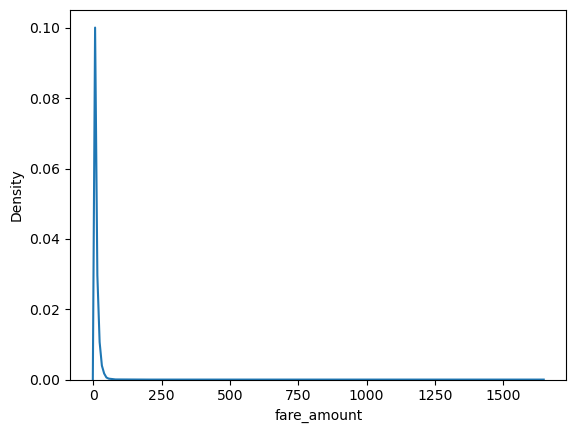

In [157]:
sns.kdeplot(Green_Taxi_To_missing['fare_amount'])  
plt.show()

In [158]:
Green_Taxi_To_missing.passenger_count.value_counts()

1.0      729363
2.0       70961
5.0       29554
6.0       16311
3.0       15449
4.0        5073
8.0          21
9.0          13
7.0          13
333.0         6
Name: passenger_count, dtype: int64

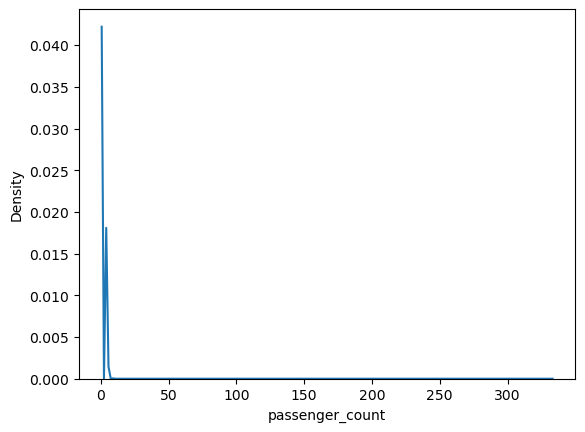

In [159]:
sns.kdeplot(Green_Taxi_To_missing['passenger_count'])
plt.show()

In [160]:
Green_Taxi_To_missing.extra.value_counts()

0.5     588762
1.0     277974
0.2         24
0.6          1
10.8         1
0.4          1
4.5          1
Name: extra, dtype: int64

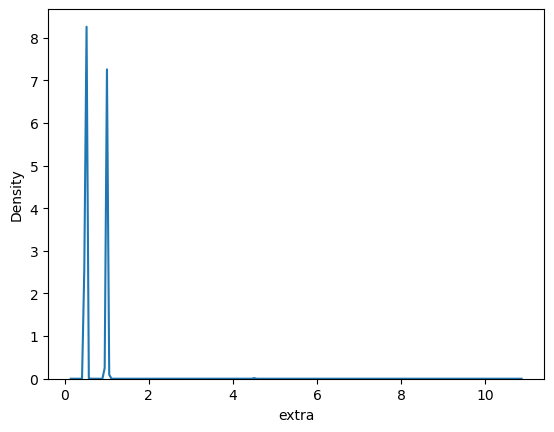

In [161]:
sns.kdeplot(Green_Taxi_To_missing['extra'])
plt.show()

In [162]:
Green_Taxi_To_missing.tip_amount.value_counts()

0.00     511024
1.00      26951
2.00      19810
3.00       7568
1.56       6836
          ...  
25.80         1
50.06         1
25.45         1
61.00         1
23.75         1
Name: tip_amount, Length: 1692, dtype: int64

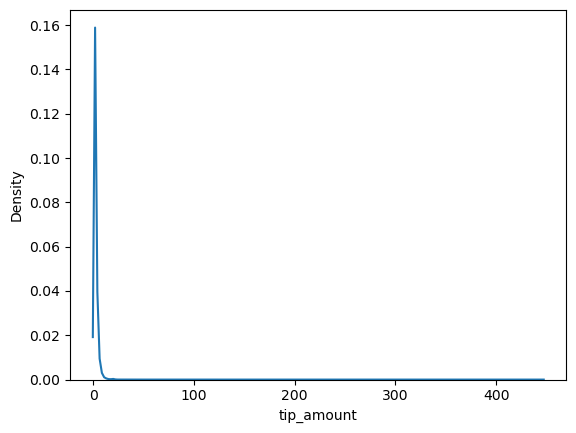

In [163]:
sns.kdeplot(Green_Taxi_To_missing['tip_amount'])
plt.show()

In [164]:
Green_Taxi_To_missing.tolls_amount.value_counts()

0.00     850663
5.76      14035
2.64        748
10.50       293
12.50       198
          ...  
5.78          1
16.95         1
5.53          1
7.20          1
4.24          1
Name: tolls_amount, Length: 120, dtype: int64

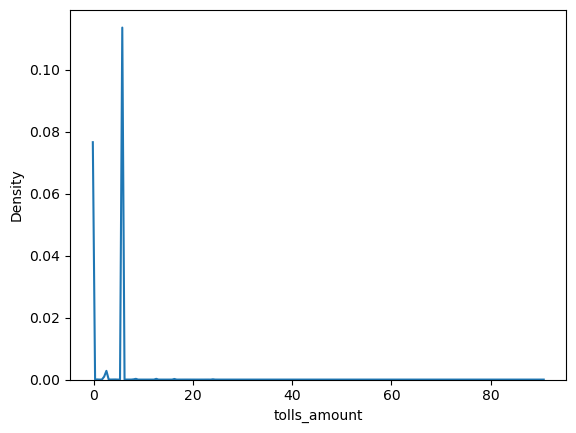

In [165]:
sns.kdeplot(Green_Taxi_To_missing['tolls_amount'])
plt.show()

In [166]:
Green_Taxi_To_missing.total_amount.value_counts()

6.80      29985
7.80      29678
7.30      29604
8.30      27328
6.30      27280
          ...  
24.62         1
80.82         1
89.82         1
109.71        1
107.82        1
Name: total_amount, Length: 5133, dtype: int64

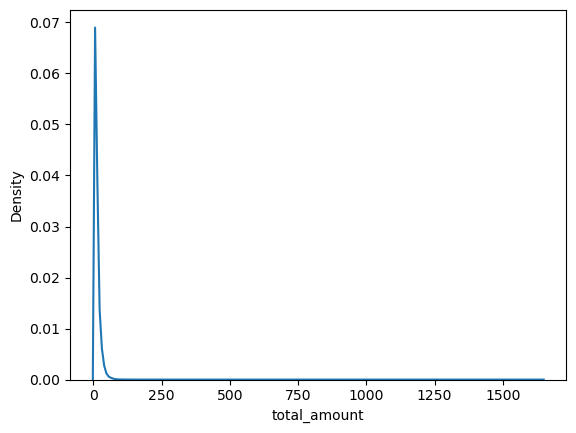

In [167]:
sns.kdeplot(Green_Taxi_To_missing['total_amount'])
plt.show()

In [168]:
Green_Taxi_To_missing.trip_distance.value_counts()

1.00     10098
0.90     10097
0.80      9930
1.10      9466
0.00      9267
         ...  
26.80        1
68.28        1
22.97        1
28.97        1
35.86        1
Name: trip_distance, Length: 2878, dtype: int64

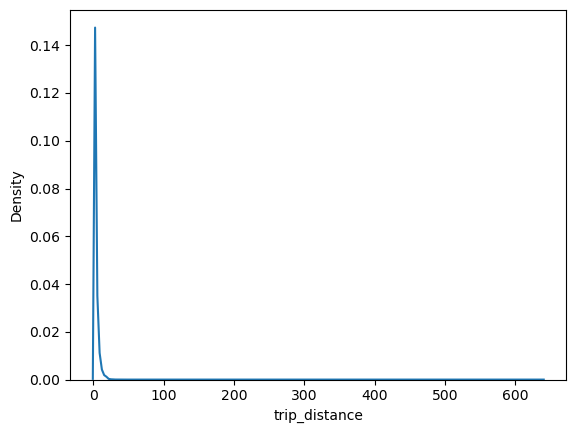

In [169]:
sns.kdeplot(Green_Taxi_To_missing['trip_distance'])
plt.show()

In [170]:
print(Green_Taxi_To_missing['passenger_count'].skew())
print(Green_Taxi_To_missing['trip_distance'].skew())
print(Green_Taxi_To_missing['fare_amount'].skew())
print(Green_Taxi_To_missing['extra'].skew())
print(Green_Taxi_To_missing['tip_amount'].skew())
print(Green_Taxi_To_missing['tolls_amount'].skew())
print(Green_Taxi_To_missing['total_amount'].skew())

101.63565150308663
14.26957212068648
10.343910090783929
2.990930769886813
18.86672044374543
13.864082675620915
7.899821284457628


## Handling outliers

In [245]:
Taxi_imp = Green_Taxi_To_missing
def detect_outlier(df,col):
    median = df[col].median()
    cutoff_pos =df[col].mean() + df[col].std() *5
    cutoff_neg = df[col].mean() - df[col].std() * 5
    condition_series = ((df[col] > cutoff_pos) | (df[col] < cutoff_neg))
    #df[col] = np.where(condition_series, median,df[col])
    num=condition_series.sum()
    return df.loc[condition_series]

# Passenger Count

In [246]:
floor = Green_Taxi_To_missing['passenger_count'].quantile(0.10)
cap = Green_Taxi_To_missing['passenger_count'].quantile(0.94)
floor,cap

(1.0, 3.0)

In [250]:
Taxi_imp['passenger_count'] = np.where(Taxi_imp['passenger_count'] <floor, floor,Taxi_imp['passenger_count'])
Taxi_imp['passenger_count'] = np.where(Taxi_imp['passenger_count'] >cap,cap,Taxi_imp['passenger_count'])

# Trip distance

In [318]:
floor = Taxi_imp['trip_distance'].quantile(0.27)
                                          
cap = Taxi_imp['trip_distance'].quantile(0.99)
floor,cap

(1.09, 14.4)

In [319]:
Taxi_imp['trip_distance'] = np.where(Taxi_imp['trip_distance'] <floor, floor,Taxi_imp['trip_distance'])
Taxi_imp['trip_distance'] = np.where(Taxi_imp['trip_distance'] >cap,cap,Taxi_imp['trip_distance'])

# Fare amount

In [327]:
floor = Taxi_imp['fare_amount'].quantile(0.01)
cap = Taxi_imp['fare_amount'].quantile(0.99)
floor,cap

(2.5, 47.5)

In [328]:
Taxi_imp = Green_Taxi_To_missing
Taxi_imp['fare_amount'] = np.where(Taxi_imp['fare_amount'] <floor, floor,Taxi_imp['fare_amount'])
Taxi_imp['fare_amount'] = np.where(Taxi_imp['fare_amount'] >cap,cap,Taxi_imp['fare_amount'])

# Extra

In [334]:
floor = Green_Taxi_To_missing['extra'].quantile(0.10)
cap = Green_Taxi_To_missing['extra'].quantile(0.99)
floor,cap

(0.5, 1.0)

In [335]:
Taxi_imp = Green_Taxi_To_missing
Taxi_imp['extra'] = np.where(Taxi_imp['extra'] <floor, floor,Taxi_imp['extra'])
Taxi_imp['extra'] = np.where(Taxi_imp['extra'] >cap,cap,Taxi_imp['extra'])

# Tip amount

In [349]:
floor = Green_Taxi_To_missing['tip_amount'].quantile(0.00)
cap = Green_Taxi_To_missing['tip_amount'].quantile(1.00)
floor,cap

(0.0, 446.79)

In [227]:
Taxi_imp = Green_Taxi_To_missing
Taxi_imp['tip_amount'] = np.where(Taxi_imp['tip_amount'] <floor, floor,Taxi_imp['tip_amount'])
Taxi_imp['tip_amount'] = np.where(Taxi_imp['tip_amount'] >cap,cap,Taxi_imp['tip_amount'])

# Tolls amount

In [365]:
floor = Green_Taxi_To_missing['tolls_amount'].quantile(0.10)
cap = Green_Taxi_To_missing['tolls_amount'].quantile(0.99)
floor,cap

(0.0, 5.76)

In [366]:
Taxi_imp = Green_Taxi_To_missing
Taxi_imp['tolls_amount'] = np.where(Taxi_imp['tolls_amount'] <floor, floor,Taxi_imp['tolls_amount'])
Taxi_imp['tolls_amount'] = np.where(Taxi_imp['tolls_amount'] >cap,cap,Taxi_imp['tolls_amount'])

# Total amount

In [367]:
floor = Green_Taxi_To_missing['total_amount'].quantile(0.01)
cap = Green_Taxi_To_missing['total_amount'].quantile(0.99)
floor,cap

(3.8, 54.75)

In [369]:
Taxi_imp = Green_Taxi_To_missing
Taxi_imp['total_amount'] = np.where(Taxi_imp['total_amount'] <floor, floor,Taxi_imp['total_amount'])
Taxi_imp['total_amount'] = np.where(Taxi_imp['total_amount'] >cap,cap,Taxi_imp['total_amount'])
Green_Taxi_To_missing = Taxi_imp

## Findings and conclusions

I didn't want to delete the values of the outliers so i used the floor and cap method (IQR) by sub the floor values or the cap values with the out of range outliers
there are other methods where you can use the elimnation method or use the standard deviation and the median, but i found the floor and cap mor convininent to me

## 4.1 - Discretization

In [209]:
Green_feature = Green_Taxi_To_missing
Green_feature.loc[:,'lpep_dropoff_datetime']=pd.to_datetime(Green_feature.loc[:,'lpep_dropoff_datetime'])
Green_feature.loc[:,'lpep_pickup_datetime']=pd.to_datetime(Green_feature.loc[:,'lpep_pickup_datetime'])
def disc_weeks(df,col,nbins,min_,max_,new_col):
    width= int((max_ - min_) /nbins)
    bins = list(range(min_,max_+1,width))
    labels = [str(i) for i in range(1,len(bins))]
    df[new_col]=pd.cut(x=df[col].dt.day,bins=bins,labels=labels,include_lowest=True)
    df[new_col+ '_disc'] = pd.cut(x=df[col].dt.day,bins=bins,include_lowest=True)

C:\Users\merow\AppData\Local\Temp\ipykernel_8808\1503681681.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Green_feature.loc[:,'lpep_dropoff_datetime']=pd.to_datetime(Green_feature.loc[:,'lpep_dropoff_datetime'])
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\1503681681.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  Green_feature.loc[:,'lpep_pickup_datetime']=pd.to_datetime(Green_feature.loc[:,'lpep_pickup_datetime'])


In [382]:
disc_weeks(Green_feature,'lpep_pickup_datetime',5,1,31,'week_num')
Green_Taxi_To_missing = Green_feature

In [211]:
Green_feature.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,payment_type,trip_type,pickup_datetime,pickup_hour,pickup_day_of_week,duration,duration_seconds,weekend,week_num,week_num_disc
0,VeriFone Inc.,2017-08-01 00:21:35,2017-08-01 00:27:59,N,Standard rate,"Manhattan,Central Park","Manhattan,Upper West Side North",1.0,1.43,7.0,...,Credit card,Street-hail,2017-08-01 00:21:35,0,1,2023-10-26 00:06:24,384,False,1,"(0.999, 7.0]"
1,VeriFone Inc.,2017-08-01 00:37:27,2017-08-01 00:39:02,N,Standard rate,"Manhattan,Morningside Heights","Manhattan,Morningside Heights",1.0,0.44,3.5,...,Cash,Street-hail,2017-08-01 00:37:27,0,1,2023-10-26 00:01:35,95,False,1,"(0.999, 7.0]"
2,VeriFone Inc.,2017-08-01 00:04:03,2017-08-01 00:05:45,N,Standard rate,"Brooklyn,Clinton Hill","Brooklyn,Prospect Heights",1.0,0.32,3.5,...,Cash,Street-hail,2017-08-01 00:04:03,0,1,2023-10-26 00:01:42,102,False,1,"(0.999, 7.0]"
3,VeriFone Inc.,2017-08-01 00:05:23,2017-08-01 00:09:20,N,Standard rate,"Manhattan,Central Park","Manhattan,Upper West Side North",2.0,1.12,5.5,...,Credit card,Street-hail,2017-08-01 00:05:23,0,1,2023-10-26 00:03:57,237,False,1,"(0.999, 7.0]"
4,VeriFone Inc.,2017-08-01 00:29:09,2017-08-01 00:34:44,N,Standard rate,"Manhattan,Bloomingdale","Manhattan,Central Harlem",2.0,1.05,6.0,...,Cash,Street-hail,2017-08-01 00:29:09,0,1,2023-10-26 00:05:35,335,False,1,"(0.999, 7.0]"


## 4.11 - Findings and conclusions

## 4.2 - Encoding

In [399]:
encode_df = Green_Taxi_To_missing
def label_encode_column(df, column):
    result = df.copy()
    le = preprocessing.LabelEncoder()
    result[column] = le.fit_transform(result[column])
    lookup_table = dict(zip(le.classes_, le.transform(le.classes_)))
    return result, lookup_table


In [400]:
lookup_table_df = pd.DataFrame(columns=['Column name', 'Original value', 'Imputed Value'])
columns_to_encode = ['vendor', 'store_and_fwd_flag', 'rate_type', 'pu_location','do_location','payment_type','trip_type'] 

In [401]:
for column in columns_to_encode:
    encode_df, lookup_table = label_encode_column(encode_df, column)
    lookup_table_df = lookup_table_df.append(pd.DataFrame([(column, original_value, imputed_value) 
    for original_value, imputed_value in lookup_table.items()],
        columns=['Column name', 'Original value', 'Imputed Value']),ignore_index=True)

C:\Users\merow\AppData\Local\Temp\ipykernel_8808\1307298017.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lookup_table_df = lookup_table_df.append(pd.DataFrame([(column, original_value, imputed_value)
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\1307298017.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lookup_table_df = lookup_table_df.append(pd.DataFrame([(column, original_value, imputed_value)
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\1307298017.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lookup_table_df = lookup_table_df.append(pd.DataFrame([(column, original_value, imputed_value)
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\1307298017.py:3: FutureWarning: The frame.append method is depr

In [402]:
encode_df.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,pickup_day_of_week,duration,duration_seconds,weekend,week_num,week_num_disc,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1,2017-08-01 00:21:35,2017-08-01 00:27:59,0,5,107,161,1.03,1.43,7.0,...,1,2023-10-26 00:06:24,384,False,1,"(0.999, 7.0]",40.782773,-73.965363,40.779793,-73.981995
1,1,2017-08-01 00:37:27,2017-08-01 00:39:02,0,5,123,145,1.03,1.09,3.5,...,1,2023-10-26 00:01:35,95,False,1,"(0.999, 7.0]",40.810000,-73.962500,40.810000,-73.962500
2,1,2017-08-01 00:04:03,2017-08-01 00:05:45,0,5,57,90,1.03,1.09,3.5,...,1,2023-10-26 00:01:42,102,False,1,"(0.999, 7.0]",40.689722,-73.965278,40.677871,-73.968473
3,1,2017-08-01 00:05:23,2017-08-01 00:09:20,0,5,107,161,2.00,1.12,5.5,...,1,2023-10-26 00:03:57,237,False,1,"(0.999, 7.0]",40.782773,-73.965363,40.779793,-73.981995
4,1,2017-08-01 00:29:09,2017-08-01 00:34:44,0,5,104,108,2.00,1.09,6.0,...,1,2023-10-26 00:05:35,335,False,1,"(0.999, 7.0]",40.799776,-73.967772,52.380840,4.636830


## 4.22 - Findings and conlcusions

In [371]:
lookup_table_df

,Column name,Original value,Imputed Value
0,vendor,"Creative Mobile Technologies, LLC",0
1,vendor,VeriFone Inc.,1
2,store_and_fwd_flag,N,0
3,store_and_fwd_flag,Y,1
4,rate_type,Group ride,0
...,...,...,...
991,payment_type,Dispute,2
992,payment_type,No charge,3
993,payment_type,Uknown,4
994,trip_type,Dispatch,0


## 4.3 - Normalisation 

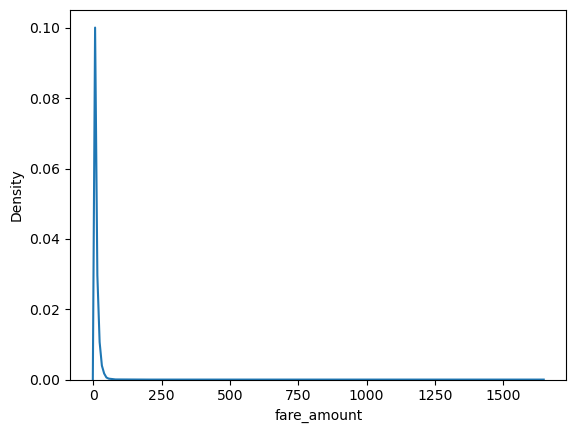

In [157]:
sns.kdeplot(Green_Taxi_To_missing['fare_amount'])  
plt.show()

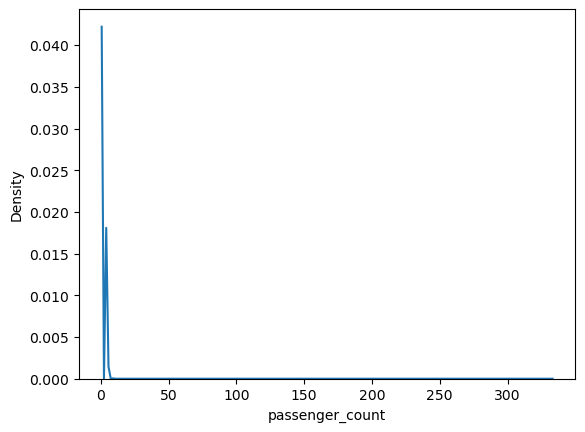

In [159]:
sns.kdeplot(Green_Taxi_To_missing['passenger_count'])
plt.show()

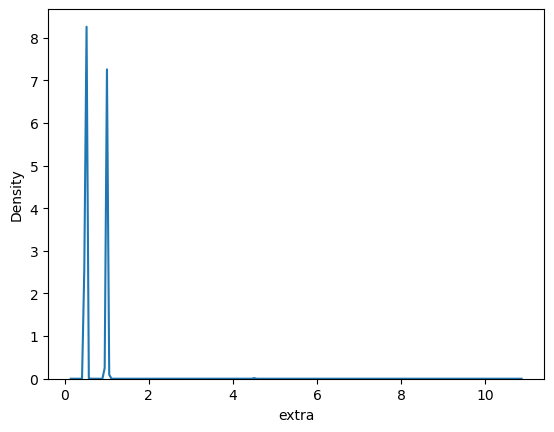

In [161]:
sns.kdeplot(Green_Taxi_To_missing['extra'])
plt.show()

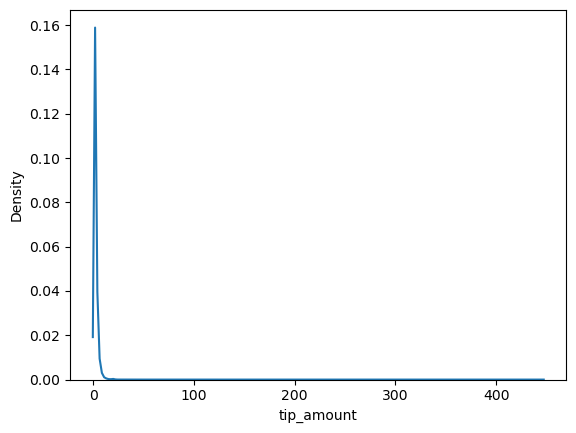

In [163]:
sns.kdeplot(Green_Taxi_To_missing['tip_amount'])
plt.show()

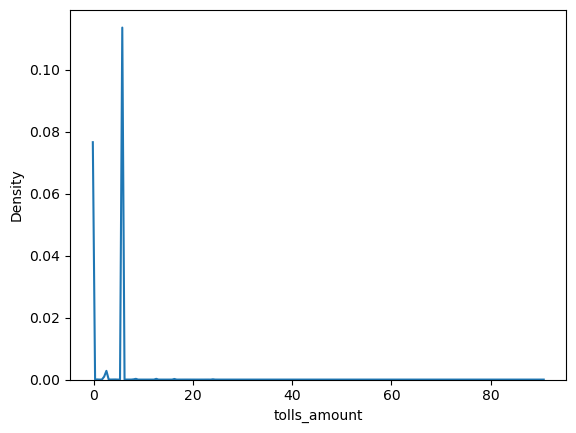

In [165]:
sns.kdeplot(Green_Taxi_To_missing['tolls_amount'])
plt.show()

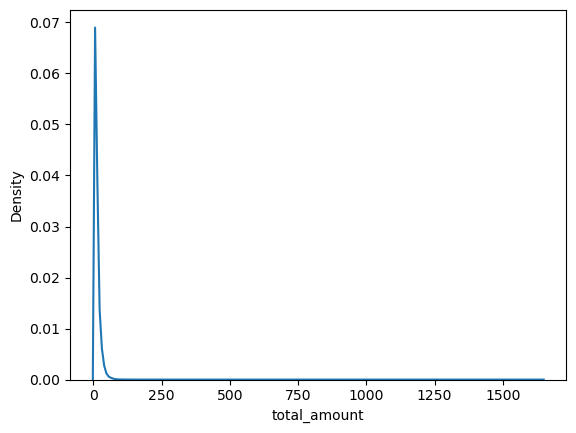

In [167]:
sns.kdeplot(Green_Taxi_To_missing['total_amount'])
plt.show()

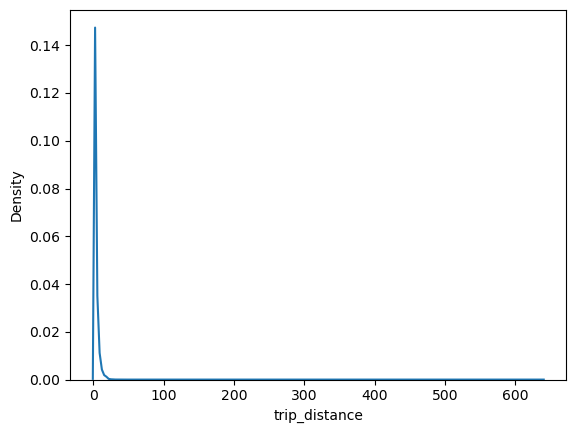

In [169]:
sns.kdeplot(Green_Taxi_To_missing['trip_distance'])
plt.show()

## 4.31 - Findings and conclusions

The passenger count,trip distance,fare amount,tolls amount, extra, tip amount, tolls amount and total amount feartures will need normalization if introtuced to ML model that assumes a normal distrution as they are highly right skewed

## 4.4 - Adding more features(feature eng.)

In [403]:
def weekend(df,col,newcol):
    df.loc[df[col].dt.weekday.isin([4,5,6]),newcol] = True 
    df.loc[df[col].dt.weekday.isin([0,1,2,3,]),newcol] = False
weekend(encode_df,'lpep_pickup_datetime','weekend')    
weekend(Green_Taxi_To_missing,'lpep_pickup_datetime','weekend')

## 4.41 - Findings and concluisons

## 4.5 - Additional data extraction (GPS coordinates)

In [178]:
# API credentials
API_KEY = '5d18223b271c453db5f0dd4235e29692'  # Replace with your actual API key

# Assuming your DataFrame is named 'df'
pickup_locations = Green_Taxi_To_missing['pu_location'].unique()
dropoff_locations = Green_Taxi_To_missing['do_location'].unique()
def geocode_location(location):
    geocoder = OpenCageGeocode(API_KEY)
    results = geocoder.geocode(location)
    if len(results) > 0:
        lat = results[0]['geometry']['lat']
        lng = results[0]['geometry']['lng']
        return lat, lng
    else:
        return None, None

In [179]:
# Create a geocoded DataFrame
geocoded_data = []
for location in set(pickup_locations) | set(dropoff_locations):
    lat, lng = geocode_location(location)
    geocoded_data.append({'location': location, 'latitude': lat, 'longitude': lng})

In [193]:
geocoded_df = pd.DataFrame(geocoded_data)

In [194]:
dfge = geocoded_df.copy()

In [195]:
missing_geocoded_df = geocoded_df.loc[dfge.latitude.isnull() == True]
missing_geocoded_df

,location,latitude,longitude
2,"Bronx,Soundview/Bruckner",NaN,NaN
3,"Brooklyn,East Flatbush/Remsen Village",NaN,NaN
14,"Queens,Hillcrest/Pomonok",NaN,NaN
23,"EWR,Newark Airport",NaN,NaN
39,"Queens,Elmhurst/Maspeth",NaN,NaN
49,"Bronx,Riverdale/North Riverdale/Fieldston",NaN,NaN
59,"Bronx,Williamsbridge/Olinville",NaN,NaN
60,"Bronx,Van Cortlandt Village",NaN,NaN
168,"Bronx,Westchester Village/Unionport",NaN,NaN
238,"Staten Island,Charleston/Tottenville",NaN,NaN


In [201]:
geocoded_df

,location,latitude,longitude
0,"Brooklyn,Sheepshead Bay",40.591216,-73.944582
1,"Queens,Rockaway Park",40.580510,-73.836153
2,"Bronx,Soundview/Bruckner",NaN,NaN
3,"Brooklyn,East Flatbush/Remsen Village",NaN,NaN
4,"Manhattan,Sutton Place/Turtle Bay North",50.333330,3.666670
...,...,...,...
253,"Brooklyn,Windsor Terrace",40.653487,-73.977196
254,"Manhattan,Penn Station/Madison Sq West",5.500000,10.666670
255,"Manhattan,Clinton West",40.759686,-73.995613
256,"Brooklyn,Marine Park/Floyd Bennett Field",40.584550,-73.884020


In [196]:
missing_geocoded = []
for location in set(missing_geocoded_df.location):
        location_parts = location.split(',')[0]
        print(location_parts)
        lat, lng = geocode_location(location_parts)
        missing_geocoded.append({'location': location, 'latitude': lat, 'longitude': lng})

Bronx
EWR
Bronx
Staten Island
Brooklyn
Bronx
Queens
Bronx
Bronx
Queens


In [197]:
missing_geocoded_df2 = pd.DataFrame(missing_geocoded)
missing_geocoded_df2

,location,latitude,longitude
0,"Bronx,Westchester Village/Unionport",40.846651,-73.878594
1,"EWR,Newark Airport",40.689064,-74.177255
2,"Bronx,Soundview/Bruckner",40.846651,-73.878594
3,"Staten Island,Charleston/Tottenville",40.583456,-74.149605
4,"Brooklyn,East Flatbush/Remsen Village",40.652601,-73.949721
5,"Bronx,Riverdale/North Riverdale/Fieldston",40.846651,-73.878594
6,"Queens,Elmhurst/Maspeth",40.713508,-73.828313
7,"Bronx,Van Cortlandt Village",40.846651,-73.878594
8,"Bronx,Williamsbridge/Olinville",40.846651,-73.878594
9,"Queens,Hillcrest/Pomonok",40.713508,-73.828313


geocoded_df.update(missing_geocoded_df)

In [202]:
geocoded_df.to_csv('geocoded_data.csv', index=False)
FileLink('geocoded_data.csv')

C:\Users\merow\geocoded_data.csv

In [394]:
df_geocode = Green_Taxi_To_missing 

merged_df = pd.merge(Green_Taxi_To_missing, geocoded_df, left_on='pu_location', right_on='location', how='left')
df_geocode['pickup_latitude'] = merged_df['latitude']
df_geocode['pickup_longitude'] = merged_df['longitude']

merged_df = pd.merge(Green_Taxi_To_missing, geocoded_df, left_on='do_location', right_on='location', how='left')
df_geocode['dropoff_latitude'] = merged_df['latitude']
df_geocode['dropoff_longitude'] = merged_df['longitude']

df_geocode.to_csv('dataset_with_coordinates.csv', index=False)


In [397]:
Green_Taxi_To_missing = df_geocode
encode_df.update(df_geocode)

In [404]:
encode_df.head()

,vendor,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,rate_type,pu_location,do_location,passenger_count,trip_distance,fare_amount,...,pickup_day_of_week,duration,duration_seconds,weekend,week_num,week_num_disc,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1,2017-08-01 00:21:35,2017-08-01 00:27:59,0,5,107,161,1.03,1.43,7.0,...,1,2023-10-26 00:06:24,384,False,1,"(0.999, 7.0]",40.782773,-73.965363,40.779793,-73.981995
1,1,2017-08-01 00:37:27,2017-08-01 00:39:02,0,5,123,145,1.03,1.09,3.5,...,1,2023-10-26 00:01:35,95,False,1,"(0.999, 7.0]",40.810000,-73.962500,40.810000,-73.962500
2,1,2017-08-01 00:04:03,2017-08-01 00:05:45,0,5,57,90,1.03,1.09,3.5,...,1,2023-10-26 00:01:42,102,False,1,"(0.999, 7.0]",40.689722,-73.965278,40.677871,-73.968473
3,1,2017-08-01 00:05:23,2017-08-01 00:09:20,0,5,107,161,2.00,1.12,5.5,...,1,2023-10-26 00:03:57,237,False,1,"(0.999, 7.0]",40.782773,-73.965363,40.779793,-73.981995
4,1,2017-08-01 00:29:09,2017-08-01 00:34:44,0,5,104,108,2.00,1.09,6.0,...,1,2023-10-26 00:05:35,335,False,1,"(0.999, 7.0]",40.799776,-73.967772,52.380840,4.636830


## 4.6 - Csv file for lookup

In [190]:
for column in columns_to_encode:
    encoded_green_taxi, lookup_table = label_encode_column(Green_Taxi_To_missing, column)
    lookup_table_df = lookup_table_df.append(pd.DataFrame([(column, original_value, imputed_value) 
    for original_value, imputed_value in lookup_table.items()],
        columns=['Column name', 'Original value', 'Imputed Value']),ignore_index=True)

lookup_table_df

C:\Users\merow\AppData\Local\Temp\ipykernel_8808\639204499.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lookup_table_df = lookup_table_df.append(pd.DataFrame([(column, original_value, imputed_value)
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\639204499.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lookup_table_df = lookup_table_df.append(pd.DataFrame([(column, original_value, imputed_value)
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\639204499.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  lookup_table_df = lookup_table_df.append(pd.DataFrame([(column, original_value, imputed_value)
C:\Users\merow\AppData\Local\Temp\ipykernel_8808\639204499.py:3: FutureWarning: The frame.append method is deprecat

,Column name,Original value,Imputed Value
0,vendor,"Creative Mobile Technologies, LLC",0
1,vendor,VeriFone Inc.,1
2,store_and_fwd_flag,N,0
3,store_and_fwd_flag,Y,1
4,rate_type,Group ride,0
...,...,...,...
493,payment_type,Dispute,2
494,payment_type,No charge,3
495,payment_type,Uknown,4
496,trip_type,Dispatch,0


In [192]:
lookup_table_df.to_csv('Lookup_Table.csv', index=False)
FileLink('Lookup_Table.csv')

C:\Users\merow\Lookup_Table.csv

## 5- Exporting the dataframe to a csv file or parquet

In [406]:
Green_Taxi_To_missing.to_csv('Green_Taxi_clean.csv', index=False)
FileLink('Green_Taxi_clean.csv')

C:\Users\merow\Green_Taxi_clean.csv

In [405]:
encode_df.to_csv('encode_df.csv', index=False)
FileLink('encode_df.csv')

C:\Users\merow\encode_df.csv